<a href="https://colab.research.google.com/github/savithashivakumaar-debug/savitha/blob/main/Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nutrition Paradox: A Global View on Obesity and Malnutrition

### Step 1:Dataset Overview & Collection

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For Obesity:

In [96]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"  #adults

import requests

response = requests.get(url)

data = response.json()

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_30C',
 'value': [{'Id': 5950373,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'DNK',
   'ParentLocationCode': 'EUR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Europe',
   'Dim1Type': 'SEX',
   'TimeDim': 2003,
   'Dim1': 'SEX_BTSX',
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '12.5 [11.6-13.4]',
   'NumericValue': 12.495024,
   'Low': 11.640002,
   'High': 13.351651,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2003',
   'TimeDimensionBegin': '2003-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2003-12-31T00:00:00+01:00'},
  {'Id': 5950381,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'GTM',
   'ParentLocationCode': 'AMR',
   'TimeDimType': 'YEAR',
   'ParentLocatio

In [97]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [98]:
import pandas as pd
df1 = pd.DataFrame(data['value'])
df1.head()

Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5950373   NCD_BMI_30C        COUNTRY        DNK                EUR   
1  5950381   NCD_BMI_30C        COUNTRY        GTM                AMR   
2  5950710   NCD_BMI_30C        COUNTRY        ALB                EUR   
3      267   NCD_BMI_30C        COUNTRY        KHM                WPR   
4      368   NCD_BMI_30C        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0        YEAR                 Europe      SEX     2003  SEX_BTSX  ...   
1        YEAR               Americas      SEX     2003  SEX_BTSX  ...   
2        YEAR                 Europe      SEX     1996   SEX_MLE  ...   
3        YEAR        Western Pacific      SEX     2001  SEX_BTSX  ...   
4        YEAR  Eastern Mediterranean      SEX     2020   SEX_MLE  ...   

  DataSourceDim             Value NumericValue        Low       High Comments  \
0          None  12.5 [11.6-13.4]    12.495024  11.640002  13.351651     None   
1          None  12.8 [11.7-13.9]    12.810887  11.711000  13.933049     None   
2          None    8.4 [5.8-11.5]     8.359822   5.766983  11.472800     None   
3          None     1.0 [0.8-1.3]     0.981696   0.756741   1.274868     None   
4          None  17.5 [15.8-19.2]    17.487641  15.793777  19.245727     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                2003   
1  2024-02-29T16:06:41.017+01:00                2003   
2  2024-02-29T16:06:41.017+01:00                1996   
3  2024-02-29T16:06:41.017+01:00                2001   
4  2024-02-29T16:06:41.017+01:00                2020   

          TimeDimensionBegin           TimeDimensionEnd  
0  2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00  
1  2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00  
2  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00  
3  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
4  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [99]:
df1.shape

(20790, 25)

# Add a new column age_group to distinguish adults and children.

In [100]:
df1["age_group"] = "adults"

In [101]:
df1.head()

Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5950373   NCD_BMI_30C        COUNTRY        DNK                EUR   
1  5950381   NCD_BMI_30C        COUNTRY        GTM                AMR   
2  5950710   NCD_BMI_30C        COUNTRY        ALB                EUR   
3      267   NCD_BMI_30C        COUNTRY        KHM                WPR   
4      368   NCD_BMI_30C        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0        YEAR                 Europe      SEX     2003  SEX_BTSX  ...   
1        YEAR               Americas      SEX     2003  SEX_BTSX  ...   
2        YEAR                 Europe      SEX     1996   SEX_MLE  ...   
3        YEAR        Western Pacific      SEX     2001  SEX_BTSX  ...   
4        YEAR  Eastern Mediterranean      SEX     2020   SEX_MLE  ...   

              Value NumericValue        Low       High Comments  \
0  12.5 [11.6-13.4]    12.495024  11.640002  13.351651     None   
1  12.8 [11.7-13.9]    12.810887  11.711000  13.933049     None   
2    8.4 [5.8-11.5]     8.359822   5.766983  11.472800     None   
3     1.0 [0.8-1.3]     0.981696   0.756741   1.274868     None   
4  17.5 [15.8-19.2]    17.487641  15.793777  19.245727     None   

                            Date TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00               2003   
1  2024-02-29T16:06:41.017+01:00               2003   
2  2024-02-29T16:06:41.017+01:00               1996   
3  2024-02-29T16:06:41.017+01:00               2001   
4  2024-02-29T16:06:41.017+01:00               2020   

          TimeDimensionBegin           TimeDimensionEnd  age_group  
0  2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00     adults  
1  2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00     adults  
2  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00     adults  
3  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     adults  
4  2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     adults  

[5 rows x 26 columns]

In [102]:
df1.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'TimeDim', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

### children

In [103]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"    #children

import requests

response = requests.get(url)

data = response.json()

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_PLUS2C',
 'value': [{'Id': 5950361,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'MUS',
   'ParentLocationCode': 'AFR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_MLE',
   'TimeDim': 1998,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS05-09',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '3.8 [0.7-10.3]',
   'NumericValue': 3.7730046,
   'Low': 0.74295313,
   'High': 10.266781,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '1998',
   'TimeDimensionBegin': '1998-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '1998-12-31T00:00:00+01:00'},
  {'Id': 5950422,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'BEN',
   'ParentLocationCode': 'AFR',
   'TimeDimType': 'YEAR',
   'ParentLo

In [104]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [105]:
import pandas as pd
df2 = pd.DataFrame(data['value'])
df2.head()

Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5950361  NCD_BMI_PLUS2C        COUNTRY        MUS                AFR   
1  5950422  NCD_BMI_PLUS2C        COUNTRY        BEN                AFR   
2  5950762  NCD_BMI_PLUS2C        COUNTRY        EGY                EMR   
3      174  NCD_BMI_PLUS2C        COUNTRY        URY                AMR   
4      561  NCD_BMI_PLUS2C        COUNTRY        AND                EUR   

  TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0        YEAR                 Africa      SEX   SEX_MLE     1998  ...   
1        YEAR                 Africa      SEX   SEX_MLE     2009  ...   
2        YEAR  Eastern Mediterranean      SEX   SEX_MLE     1995  ...   
3        YEAR               Americas      SEX  SEX_BTSX     2014  ...   
4        YEAR                 Europe      SEX   SEX_MLE     1993  ...   

  DataSourceDim             Value NumericValue        Low       High Comments  \
0          None    3.8 [0.7-10.3]     3.773005   0.742953  10.266781     None   
1          None     2.2 [0.5-5.5]     2.171156   0.527551   5.472248     None   
2          None    7.8 [4.5-11.9]     7.801627   4.546450  11.871974     None   
3          None  16.6 [14.1-19.3]    16.599445  14.139628  19.260336     None   
4          None    6.6 [1.7-15.5]     6.573471   1.651655  15.450512     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                1998   
1  2024-02-29T16:06:41.017+01:00                2009   
2  2024-02-29T16:06:41.017+01:00                1995   
3  2024-02-29T16:06:41.017+01:00                2014   
4  2024-02-29T16:06:41.017+01:00                1993   

          TimeDimensionBegin           TimeDimensionEnd  
0  1998-01-01T00:00:00+01:00  1998-12-31T00:00:00+01:00  
1  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00  
2  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00  
3  2014-01-01T00:00:00+01:00  2014-12-31T00:00:00+01:00  
4  1993-01-01T00:00:00+01:00  1993-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [106]:
df2.shape

(62370, 25)

In [107]:
df2["age_group"] = "children"

In [108]:
df2.head()

Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5950361  NCD_BMI_PLUS2C        COUNTRY        MUS                AFR   
1  5950422  NCD_BMI_PLUS2C        COUNTRY        BEN                AFR   
2  5950762  NCD_BMI_PLUS2C        COUNTRY        EGY                EMR   
3      174  NCD_BMI_PLUS2C        COUNTRY        URY                AMR   
4      561  NCD_BMI_PLUS2C        COUNTRY        AND                EUR   

  TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0        YEAR                 Africa      SEX   SEX_MLE     1998  ...   
1        YEAR                 Africa      SEX   SEX_MLE     2009  ...   
2        YEAR  Eastern Mediterranean      SEX   SEX_MLE     1995  ...   
3        YEAR               Americas      SEX  SEX_BTSX     2014  ...   
4        YEAR                 Europe      SEX   SEX_MLE     1993  ...   

              Value NumericValue        Low       High Comments  \
0    3.8 [0.7-10.3]     3.773005   0.742953  10.266781     None   
1     2.2 [0.5-5.5]     2.171156   0.527551   5.472248     None   
2    7.8 [4.5-11.9]     7.801627   4.546450  11.871974     None   
3  16.6 [14.1-19.3]    16.599445  14.139628  19.260336     None   
4    6.6 [1.7-15.5]     6.573471   1.651655  15.450512     None   

                            Date TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00               1998   
1  2024-02-29T16:06:41.017+01:00               2009   
2  2024-02-29T16:06:41.017+01:00               1995   
3  2024-02-29T16:06:41.017+01:00               2014   
4  2024-02-29T16:06:41.017+01:00               1993   

          TimeDimensionBegin           TimeDimensionEnd  age_group  
0  1998-01-01T00:00:00+01:00  1998-12-31T00:00:00+01:00   children  
1  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00   children  
2  1995-01-01T00:00:00+01:00  1995-12-31T00:00:00+01:00   children  
3  2014-01-01T00:00:00+01:00  2014-12-31T00:00:00+01:00   children  
4  1993-01-01T00:00:00+01:00  1993-12-31T00:00:00+01:00   children  

[5 rows x 26 columns]

In [109]:
df2.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

### Combine the two obesity datasets into one dataframe called df_obesity.

In [110]:
import pandas as pd

# Step 1: Use the existing dataframes df1 and df2
# df1 = pd.read_csv('obesity_data1.csv')
# df2 = pd.read_csv('obesity_data2.csv')

# Step 2: Combine (merge or concatenate) them into one dataframe
df_obesity = pd.concat([df1, df2], ignore_index=True)

# Step 3: Display the combined dataframe
print(df_obesity.head())

        Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5950373   NCD_BMI_30C        COUNTRY        DNK                EUR   
1  5950381   NCD_BMI_30C        COUNTRY        GTM                AMR   
2  5950710   NCD_BMI_30C        COUNTRY        ALB                EUR   
3      267   NCD_BMI_30C        COUNTRY        KHM                WPR   
4      368   NCD_BMI_30C        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim      Dim1  ...  \
0        YEAR                 Europe      SEX     2003  SEX_BTSX  ...   
1        YEAR               Americas      SEX     2003  SEX_BTSX  ...   
2        YEAR                 Europe      SEX     1996   SEX_MLE  ...   
3        YEAR        Western Pacific      SEX     2001  SEX_BTSX  ...   
4        YEAR  Eastern Mediterranean      SEX     2020   SEX_MLE  ...   

              Value NumericValue        Low       High Comments  \
0  12.5 [11.6-13.4]    12.495024  11.640002  13.351651 

### Filter each dataset to include only records from the years 2012 to 2022

In [111]:
# Filter df1 for years 2012–2022
df1_filtered = df1[(df1['TimeDim'] >= 2012) & (df1['TimeDim'] <= 2022)]

# Filter df2 for years 2012–2022
df2_filtered = df2[(df2['TimeDim'] >= 2012) & (df2['TimeDim'] <= 2022)]


In [112]:
import pandas as pd

# Combine the filtered datasets
df_obesity = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Optional: check
print(df_obesity['TimeDim'].min(), df_obesity['TimeDim'].max())  # Should show 2012 and 2022
print(df_obesity.shape)  # Number of rows and columns


2012 2022
(27720, 26)


# Step 2: 🧹 Data Cleaning & Feature Engineering

In [113]:
import pandas as pd

columns_needed = [
    "ParentLocation",
    "Dim1",
    "TimeDim",
    "Low",
    "High",
    "NumericValue",
    "SpatialDim",
    "age_group"
]

df2_filtered = df2[columns_needed]

print(df2_filtered.head())


          ParentLocation      Dim1  TimeDim        Low       High  \
0                 Africa   SEX_MLE     1998   0.742953  10.266781   
1                 Africa   SEX_MLE     2009   0.527551   5.472248   
2  Eastern Mediterranean   SEX_MLE     1995   4.546450  11.871974   
3               Americas  SEX_BTSX     2014  14.139628  19.260336   
4                 Europe   SEX_MLE     1993   1.651655  15.450512   

   NumericValue SpatialDim age_group  
0      3.773005        MUS  children  
1      2.171156        BEN  children  
2      7.801627        EGY  children  
3     16.599445        URY  children  
4      6.573471        AND  children  


### Columns to Retain:

In [114]:
import pandas as pd

columns_needed = [
    "ParentLocation",
    "Dim1",
    "TimeDim",
    "Low",
    "High",
    "NumericValue",
    "SpatialDim",
    "age_group"
]

# Filter columns
df1_filtered = df1[columns_needed]
df2_filtered = df2[columns_needed]

# Keep only rows where TimeDim is between 2012 and 2022
df1_filtered = df1_filtered[(df1_filtered["TimeDim"] >= 2012) & (df1_filtered["TimeDim"] <= 2022)]
df2_filtered = df2_filtered[(df2_filtered["TimeDim"] >= 2012) & (df2_filtered["TimeDim"] <= 2022)]

# Combine into one dataframe
df_obesity = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

print(df_obesity.head())
print("\nShape of combined dataset:", df_obesity.shape)



          ParentLocation      Dim1  TimeDim        Low       High  \
0  Eastern Mediterranean   SEX_MLE     2020  15.793777  19.245727   
1  Eastern Mediterranean   SEX_MLE     2020  23.089589  33.815336   
2                 Europe  SEX_FMLE     2014  24.924766  31.213260   
3                 Europe  SEX_FMLE     2019  28.160682  35.574925   
4                 Europe  SEX_BTSX     2018  29.905805  37.470856   

   NumericValue SpatialDim age_group  
0     17.487641        IRN    adults  
1     28.335530        IRQ    adults  
2     27.948704        GRL    adults  
3     31.893221        ARM    adults  
4     33.694205        MLT    adults  

Shape of combined dataset: (27720, 8)


### Rename Columns for Consistency:

In [115]:
# Rename columns for consistency
df_obesity = df_obesity.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country"
})

# Standardize Gender values
gender_map = {
    "Both sexes": "Both",
    "BTSX": "Both",
    "Male": "Male",
    "MLE": "Male",
    "Female": "Female",
    "FMLE": "Female"
}

df_obesity["Gender"] = df_obesity["Gender"].replace(gender_map)

print(df_obesity.head())
print("\nUnique Gender values:", df_obesity["Gender"].unique())


                  Region    Gender  Year  LowerBound  UpperBound  \
0  Eastern Mediterranean   SEX_MLE  2020   15.793777   19.245727   
1  Eastern Mediterranean   SEX_MLE  2020   23.089589   33.815336   
2                 Europe  SEX_FMLE  2014   24.924766   31.213260   
3                 Europe  SEX_FMLE  2019   28.160682   35.574925   
4                 Europe  SEX_BTSX  2018   29.905805   37.470856   

   Mean_Estimate Country age_group  
0      17.487641     IRN    adults  
1      28.335530     IRQ    adults  
2      27.948704     GRL    adults  
3      31.893221     ARM    adults  
4      33.694205     MLT    adults  

Unique Gender values: ['SEX_MLE' 'SEX_FMLE' 'SEX_BTSX']


### Convert Country Codes to Full Names using pycountry:

# Install ‘pycountry’ package

In [116]:
!pip install pycountry

# Import the package in your Python script or notebook

In [117]:
import pycountry

special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

def convert_country(code):
    # Handle special cases first
    if code in special_cases:
        return special_cases[code]

    # Try to look up in pycountry using Alpha-3 code
    try:
        return pycountry.countries.get(alpha_3=code).name
    except AttributeError:
        # If Alpha-3 fails, try Alpha-2
        try:
            return pycountry.countries.get(alpha_2=code).name
        except AttributeError:
            return code  # If no match found, keep original

## Define a function to convert the 3-letter codes to full names

In [118]:
import pycountry
print(convert_country('AFR'))

Africa


## Apply the function to the Country colum

In [119]:
import pandas as pd
import pycountry

# Example data
df = pd.DataFrame({
    'Country': ['IND', 'USA', 'AFR', 'FRA', 'CHN']
})

# Function to convert 3-letter codes to full names (handles regions too)
def convert_country(code):
    regions = {
        'AFR': 'Africa',
        'EUR': 'Europe',
        'ASI': 'Asia',
        'AME': 'America',
        'OCE': 'Oceania'
    }
    code = str(code).upper()

    if code in regions:
        return regions[code]

    country = pycountry.countries.get(alpha_3=code)
    return country.name if country else "Invalid country code"

# ✅ Apply the function to the Country column
df['Country_Full'] = df['Country'].apply(convert_country)

print(df)


  Country   Country_Full
0     IND          India
1     USA  United States
2     AFR         Africa
3     FRA         France
4     CHN          China


Handle any remaining unmatched codes using the following dictionary for special values like 'GLOBAL', 'AFR', 'SEAR', etc.

In [120]:
import pandas as pd
import pycountry

# Example DataFrame
df = pd.DataFrame({
    'Country': ['IND', 'USA', 'AFR', 'GLOBAL', 'SEAR', 'EUR', 'XYZ']
})

# Dictionary for special or regional codes
special_regions = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region'
}

# Function to convert country/region codes to full names
def convert_country(code):
    if not code:
        return "Unknown"

    code = str(code).upper()

    # 1️⃣ Check special codes
    if code in special_regions:
        return special_regions[code]

    # 2️⃣ Try pycountry for standard ISO 3-letter country codes
    country = pycountry.countries.get(alpha_3=code)
    if country:
        return country.name

    # 3️⃣ Fallback for unmatched codes
    return "Unmatched"

# ✅ Apply the function
df['Country_Full'] = df['Country'].apply(convert_country)

print(df)

  Country            Country_Full
0     IND                   India
1     USA           United States
2     AFR                  Africa
3  GLOBAL                  Global
4    SEAR  South-East Asia Region
5     EUR                  Europe
6     XYZ               Unmatched


### New Columns to Create:

# 1. age_group: Manually assign this column based on the dataset source.
*Use "Adult" for datasets NCD_BMI_30C and NCD_BMI_18C.

In [121]:
import pandas as pd

# Example DataFrames (already loaded separately)
df_30C = pd.DataFrame({'Dataset': ['NCD_BMI_30C'] * 3, 'Value': [25, 27, 29]})
df_18C = pd.DataFrame({'Dataset': ['NCD_BMI_18C'] * 3, 'Value': [20, 22, 23]})

# ✅ Assign manually based on dataset
df_30C['age_group'] = 'Adult'
df_18C['age_group'] = 'Adult'

# Combine if needed
df_combined = pd.concat([df_30C, df_18C], ignore_index=True)
print(df_combined)


       Dataset  Value age_group
0  NCD_BMI_30C     25     Adult
1  NCD_BMI_30C     27     Adult
2  NCD_BMI_30C     29     Adult
3  NCD_BMI_18C     20     Adult
4  NCD_BMI_18C     22     Adult
5  NCD_BMI_18C     23     Adult


Use "Child/Adolescent" for datasets NCD_BMI_PLUS2C and NCD_BMI_MINUS2C.

In [122]:
import pandas as pd

# Example combined dataset
df = pd.DataFrame({
    'Dataset': ['NCD_BMI_30C', 'NCD_BMI_18C', 'NCD_BMI_PLUS2C', 'NCD_BMI_MINUS2C'],
    'Value': [25.3, 22.7, 19.4, 17.8]
})

# ✅ Assign age group based on dataset name
df['age_group'] = df['Dataset'].map({
    'NCD_BMI_30C': 'Adult',
    'NCD_BMI_18C': 'Adult',
    'NCD_BMI_PLUS2C': 'Child/Adolescent',
    'NCD_BMI_MINUS2C': 'Child/Adolescent'
})

print(df)


           Dataset  Value         age_group
0      NCD_BMI_30C   25.3             Adult
1      NCD_BMI_18C   22.7             Adult
2   NCD_BMI_PLUS2C   19.4  Child/Adolescent
3  NCD_BMI_MINUS2C   17.8  Child/Adolescent


# 2. CI_Width: Calculate the confidence interval width.**bold text**
*Formula: CI_Width = High - Low

In [123]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'High': [30.5, 25.2, 19.8, 22.4],
    'Low': [28.1, 23.7, 18.6, 21.0]
})

# ✅ Calculate CI_Width
df['CI_Width'] = df['High'] - df['Low']

print(df)


   High   Low  CI_Width
0  30.5  28.1       2.4
1  25.2  23.7       1.5
2  19.8  18.6       1.2
3  22.4  21.0       1.4


# 3. obesity_level (for the obesity table only):
*Categorize obesity levels based on Mean_Estimate:
   *>= 30 → High


In [124]:
import pandas as pd

# Example obesity dataset
df_obesity = pd.DataFrame({
    'Mean_Estimate': [32.5, 29.1, 18.4, 34.2, 27.9]
})

# ✅ Categorize obesity levels
df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(
    lambda x: 'High' if x >= 30 else 'Below 30'
)

print(df_obesity)


   Mean_Estimate obesity_level
0           32.5          High
1           29.1      Below 30
2           18.4      Below 30
3           34.2          High
4           27.9      Below 30


In [125]:
def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)


# * 25–29.9 → Moderate

In [126]:
import pandas as pd

# Example obesity dataset
df_obesity = pd.DataFrame({
    'Mean_Estimate': [32.5, 29.1, 24.7, 34.2, 18.9]
})

# ✅ Categorize obesity levels based on Mean_Estimate
def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)

print(df_obesity)


   Mean_Estimate obesity_level
0           32.5          High
1           29.1      Moderate
2           24.7           Low
3           34.2          High
4           18.9           Low


< 25 → Low

In [127]:
import pandas as pd

# Example obesity dataset
df_obesity = pd.DataFrame({
    'Mean_Estimate': [32.5, 29.1, 24.7, 34.2, 18.9]
})

# ✅ Categorize obesity levels based on Mean_Estimate
def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    elif x < 25:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)

print(df_obesity)


   Mean_Estimate obesity_level
0           32.5          High
1           29.1      Moderate
2           24.7           Low
3           34.2          High
4           18.9           Low


# Each dataset will end up with 10 columns after cleaning and feature engineering

In [128]:
import pandas as pd

# Example malnutrition dataset
df = pd.DataFrame({
    'ParentLocation': ['India', 'Nepal', 'Bangladesh', 'Sri Lanka'],
    'SpatialDim': ['South Asia']*4,
    'TimeDim': [2018, 2019, 2020, 2021],
    'Dim1': ['Stunting', 'Wasting', 'Underweight', 'Stunting'],
    'Mean_Estimate': [22.5, 18.4, 12.9, 25.7],
    'Low': [20.0, 15.0, 10.0, 22.0],
    'High': [25.0, 22.0, 15.0, 28.0],
    'NumericValue': [22.5, 18.4, 12.9, 25.7],
    'age_group': ['Child/Adolescent']*4
})

# Select & rename columns for consistency
df = df.rename(columns={
    "ParentLocation": "Country",
    "Dim1": "Indicator",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Value",
    "SpatialDim": "Region"
})

# Feature engineering
df['CI_Width'] = df['UpperBound'] - df['LowerBound']

# Malnutrition level
df['malnutrition_level'] = pd.cut(
    df['Mean_Estimate'],
    bins=[-float('inf'), 10, 19.9, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# Keep only 10 columns
df = df[['Country', 'Region', 'Year', 'Indicator', 'Mean_Estimate',
         'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width']]

print(df)


      Country      Region  Year    Indicator  Mean_Estimate  LowerBound  \
0       India  South Asia  2018     Stunting           22.5        20.0   
1       Nepal  South Asia  2019      Wasting           18.4        15.0   
2  Bangladesh  South Asia  2020  Underweight           12.9        10.0   
3   Sri Lanka  South Asia  2021     Stunting           25.7        22.0   

   UpperBound  Value         age_group  CI_Width  
0        25.0   22.5  Child/Adolescent       5.0  
1        22.0   18.4  Child/Adolescent       7.0  
2        15.0   12.9  Child/Adolescent       5.0  
3        28.0   25.7  Child/Adolescent       6.0  


Column Descriptions


In [129]:
import pandas as pd
import pycountry

# Example raw dataset
df = pd.DataFrame({
    'Dataset': ['NCD_BMI_30C', 'NCD_BMI_18C', 'NCD_BMI_PLUS2C', 'NCD_BMI_MINUS2C'],
    'Year': [2015, 2016, 2017, 2018],
    'Gender': ['Male', 'Female', 'Both', 'Male'],
    'Mean_Estimate': [32.5, 22.7, 19.4, 17.8],
    'Low': [30.0, 21.0, 18.0, 16.0],
    'High': [35.0, 24.0, 21.0, 19.0],
    'Country_Code': ['IND', 'USA', 'NPL', 'AFR']  # 3-letter codes
})

# 1️⃣ Assign Age_Group
df['Age_Group'] = df['Dataset'].map({
    'NCD_BMI_30C': 'Adult',
    'NCD_BMI_18C': 'Adult',
    'NCD_BMI_PLUS2C': 'Child/Adolescent',
    'NCD_BMI_MINUS2C': 'Child/Adolescent'
})

# 2️⃣ Convert Country code to full name and WHO Region
special_regions = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region'
}

def convert_country(code):
    code = str(code).upper()
    if code in special_regions:
        return special_regions[code]
    country = pycountry.countries.get(alpha_3=code)
    return country.name if country else 'Unmatched'

def get_region(code):
    code = str(code).upper()
    return special_regions.get(code, 'Unknown')  # WHO region or 'Unknown'

df['Country'] = df['Country_Code'].apply(convert_country)
df['Region'] = df['Country_Code'].apply(get_region)

# 3️⃣ CI_Width
df['CI_Width'] = df['High'] - df['Low']

# 4️⃣ Obesity_Level (only for obesity datasets)
def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    else:
        return 'Low'

# Apply only if this is an obesity dataset
df['Obesity_Level'] = df['Mean_Estimate'].apply(categorize_obesity)

# 5️⃣ Placeholder for Malnutrition_Level (if processing malnutrition table separately)
df['Malnutrition_Level'] = None  # Fill this when handling malnutrition data

# 6️⃣ Select/Order Columns according to your schema
df = df[['Year', 'Gender', 'Mean_Estimate', 'Low', 'High', 'Age_Group',
         'Country', 'Region', 'CI_Width', 'Obesity_Level', 'Malnutrition_Level']]

print(df)

   Year  Gender  Mean_Estimate   Low  High         Age_Group        Country  \
0  2015    Male           32.5  30.0  35.0             Adult          India   
1  2016  Female           22.7  21.0  24.0             Adult  United States   
2  2017    Both           19.4  18.0  21.0  Child/Adolescent          Nepal   
3  2018    Male           17.8  16.0  19.0  Child/Adolescent         Africa   

    Region  CI_Width Obesity_Level Malnutrition_Level  
0  Unknown       5.0          High               None  
1  Unknown       3.0           Low               None  
2  Unknown       3.0           Low               None  
3   Africa       3.0           Low               None  


### **For Malnutrition:**

In [130]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"    #Underweight in adults (BMI < 18.5)

import requests

response = requests.get(url)

data = response.json()

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_18C',
 'value': [{'Id': 54,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'GAB',
   'ParentLocationCode': 'AFR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_FMLE',
   'TimeDim': 2021,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '5.8 [4.0-8.1]',
   'NumericValue': 5.7951104,
   'Low': 3.9720364,
   'High': 8.0770209,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2021',
   'TimeDimensionBegin': '2021-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2021-12-31T00:00:00+01:00'},
  {'Id': 426,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'TUV',
   'ParentLocationCode': 'WPR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'Western

In [131]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [132]:
import pandas as pd
df3 = pd.DataFrame(data['value'])
df3.head()

Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0    54   NCD_BMI_18C        COUNTRY        GAB                AFR   
1   426   NCD_BMI_18C        COUNTRY        TUV                WPR   
2  1701   NCD_BMI_18C        COUNTRY        GHA                AFR   
3  2081   NCD_BMI_18C        COUNTRY        TCD                AFR   
4  2284   NCD_BMI_18C        COUNTRY        MNG                WPR   

  TimeDimType   ParentLocation Dim1Type      Dim1  TimeDim  ... DataSourceDim  \
0        YEAR           Africa      SEX  SEX_FMLE     2021  ...          None   
1        YEAR  Western Pacific      SEX  SEX_BTSX     2001  ...          None   
2        YEAR           Africa      SEX   SEX_MLE     2002  ...          None   
3        YEAR           Africa      SEX  SEX_BTSX     1990  ...          None   
4        YEAR  Western Pacific      SEX  SEX_BTSX     2017  ...          None   

              Value NumericValue        Low       High Comments  \
0     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
1     0.9 [0.4-1.9]     0.936569   0.365154   1.859289     None   
2  13.2 [10.0-16.7]    13.204283  10.048541  16.712034     None   
3  23.2 [17.8-29.0]    23.201345  17.808078  28.990203     None   
4     3.1 [2.4-3.8]     3.090652   2.428230   3.842155     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                2021   
1  2024-02-29T16:06:41.017+01:00                2001   
2  2024-02-29T16:06:41.017+01:00                2002   
3  2024-02-29T16:06:41.017+01:00                1990   
4  2024-02-29T16:06:41.017+01:00                2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00  
1  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  
2  2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00  
3  1990-01-01T00:00:00+01:00  1990-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [133]:
df3.shape

(20790, 25)

In [134]:
df3["age_group"] ="Underweight in adults"

In [135]:
df3.head()

Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0    54   NCD_BMI_18C        COUNTRY        GAB                AFR   
1   426   NCD_BMI_18C        COUNTRY        TUV                WPR   
2  1701   NCD_BMI_18C        COUNTRY        GHA                AFR   
3  2081   NCD_BMI_18C        COUNTRY        TCD                AFR   
4  2284   NCD_BMI_18C        COUNTRY        MNG                WPR   

  TimeDimType   ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0        YEAR           Africa      SEX  SEX_FMLE     2021  ...   
1        YEAR  Western Pacific      SEX  SEX_BTSX     2001  ...   
2        YEAR           Africa      SEX   SEX_MLE     2002  ...   
3        YEAR           Africa      SEX  SEX_BTSX     1990  ...   
4        YEAR  Western Pacific      SEX  SEX_BTSX     2017  ...   

              Value NumericValue        Low       High Comments  \
0     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
1     0.9 [0.4-1.9]     0.936569   0.365154   1.859289     None   
2  13.2 [10.0-16.7]    13.204283  10.048541  16.712034     None   
3  23.2 [17.8-29.0]    23.201345  17.808078  28.990203     None   
4     3.1 [2.4-3.8]     3.090652   2.428230   3.842155     None   

                            Date TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00               2021   
1  2024-02-29T16:06:41.017+01:00               2001   
2  2024-02-29T16:06:41.017+01:00               2002   
3  2024-02-29T16:06:41.017+01:00               1990   
4  2024-02-29T16:06:41.017+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd              age_group  
0  2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00  Underweight in adults  
1  2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00  Underweight in adults  
2  2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00  Underweight in adults  
3  1990-01-01T00:00:00+01:00  1990-12-31T00:00:00+01:00  Underweight in adults  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  Underweight in adults  

[5 rows x 26 columns]

In [136]:
df3.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

### Thinness in children

In [137]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

import requests

response = requests.get(url)

data = response.json()

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_MINUS2C',
 'value': [{'Id': 5950336,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'GRL',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EUR',
   'ParentLocation': 'Europe',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_MLE',
   'TimeDim': 1994,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS05-09',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '0.8 [0.1-2.9]',
   'NumericValue': 0.84183356,
   'Low': 0.098420889,
   'High': 2.8943909,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '1994',
   'TimeDimensionBegin': '1994-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '1994-12-31T00:00:00+01:00'},
  {'Id': 5950580,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'HUN',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EUR',
   'Pare

In [138]:
data.keys()

dict_keys(['@odata.context', 'value'])

In [139]:
import pandas as pd
df4 = pd.DataFrame(data['value'])
df4.head()

Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5950336  NCD_BMI_MINUS2C        COUNTRY        GRL        YEAR   
1  5950580  NCD_BMI_MINUS2C        COUNTRY        HUN        YEAR   
2  5950603  NCD_BMI_MINUS2C        COUNTRY        PRI        YEAR   
3  5950774  NCD_BMI_MINUS2C        COUNTRY        MUS        YEAR   
4       25  NCD_BMI_MINUS2C        COUNTRY        AUT        YEAR   

  ParentLocationCode ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0                EUR         Europe      SEX   SEX_MLE     1994  ...   
1                EUR         Europe      SEX   SEX_MLE     1996  ...   
2                AMR       Americas      SEX  SEX_FMLE     2002  ...   
3                AFR         Africa      SEX  SEX_FMLE     2010  ...   
4                EUR         Europe      SEX  SEX_FMLE     2009  ...   

  DataSourceDim           Value NumericValue       Low       High Comments  \
0          None   0.8 [0.1-2.9]     0.841834  0.098421   2.894391     None   
1          None   3.3 [1.7-5.6]     3.286830  1.696893   5.556403     None   
2          None   3.4 [0.6-9.6]     3.390321  0.558111   9.594756     None   
3          None  8.7 [3.8-16.1]     8.684924  3.754561  16.092512     None   
4          None   2.1 [1.5-2.8]     2.097914  1.511958   2.814735     None   

                            Date  TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00                1994   
1  2024-02-29T16:06:41.017+01:00                1996   
2  2024-02-29T16:06:41.017+01:00                2002   
3  2024-02-29T16:06:41.017+01:00                2010   
4  2024-02-29T16:06:41.017+01:00                2009   

          TimeDimensionBegin           TimeDimensionEnd  
0  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  
1  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00  
2  2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00  
3  2010-01-01T00:00:00+01:00  2010-12-31T00:00:00+01:00  
4  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00  

[5 rows x 25 columns]

In [140]:
df4.shape

(62370, 25)

In [141]:
df4["age_group"] ="Thinness in children"

In [142]:
df4.head()

Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5950336  NCD_BMI_MINUS2C        COUNTRY        GRL        YEAR   
1  5950580  NCD_BMI_MINUS2C        COUNTRY        HUN        YEAR   
2  5950603  NCD_BMI_MINUS2C        COUNTRY        PRI        YEAR   
3  5950774  NCD_BMI_MINUS2C        COUNTRY        MUS        YEAR   
4       25  NCD_BMI_MINUS2C        COUNTRY        AUT        YEAR   

  ParentLocationCode ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0                EUR         Europe      SEX   SEX_MLE     1994  ...   
1                EUR         Europe      SEX   SEX_MLE     1996  ...   
2                AMR       Americas      SEX  SEX_FMLE     2002  ...   
3                AFR         Africa      SEX  SEX_FMLE     2010  ...   
4                EUR         Europe      SEX  SEX_FMLE     2009  ...   

            Value NumericValue       Low       High Comments  \
0   0.8 [0.1-2.9]     0.841834  0.098421   2.894391     None   
1   3.3 [1.7-5.6]     3.286830  1.696893   5.556403     None   
2   3.4 [0.6-9.6]     3.390321  0.558111   9.594756     None   
3  8.7 [3.8-16.1]     8.684924  3.754561  16.092512     None   
4   2.1 [1.5-2.8]     2.097914  1.511958   2.814735     None   

                            Date TimeDimensionValue  \
0  2024-02-29T16:06:41.017+01:00               1994   
1  2024-02-29T16:06:41.017+01:00               1996   
2  2024-02-29T16:06:41.017+01:00               2002   
3  2024-02-29T16:06:41.017+01:00               2010   
4  2024-02-29T16:06:41.017+01:00               2009   

          TimeDimensionBegin           TimeDimensionEnd             age_group  
0  1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00  Thinness in children  
1  1996-01-01T00:00:00+01:00  1996-12-31T00:00:00+01:00  Thinness in children  
2  2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00  Thinness in children  
3  2010-01-01T00:00:00+01:00  2010-12-31T00:00:00+01:00  Thinness in children  
4  2009-01-01T00:00:00+01:00  2009-12-31T00:00:00+01:00  Thinness in children  

[5 rows x 26 columns]

In [143]:
df4.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'age_group'],
      dtype='object')

### Combine the two malnutrition datasets into one dataframe called df_malnutrition.

In [144]:
import pandas as pd

# Combine them into one dataframe
df_malnutrition = pd.concat([df3, df4], ignore_index=True)

print(df_malnutrition.head())


     Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0    54   NCD_BMI_18C        COUNTRY        GAB                AFR   
1   426   NCD_BMI_18C        COUNTRY        TUV                WPR   
2  1701   NCD_BMI_18C        COUNTRY        GHA                AFR   
3  2081   NCD_BMI_18C        COUNTRY        TCD                AFR   
4  2284   NCD_BMI_18C        COUNTRY        MNG                WPR   

  TimeDimType   ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0        YEAR           Africa      SEX  SEX_FMLE     2021  ...   
1        YEAR  Western Pacific      SEX  SEX_BTSX     2001  ...   
2        YEAR           Africa      SEX   SEX_MLE     2002  ...   
3        YEAR           Africa      SEX  SEX_BTSX     1990  ...   
4        YEAR  Western Pacific      SEX  SEX_BTSX     2017  ...   

              Value NumericValue        Low       High Comments  \
0     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
1     0.9 [0.4-1.9]     0.936569   0.36515

### Filter each dataset to include only records from the years 2012 to 2022

In [145]:
# Filter df3 for years 2012–2022
df3_filtered = df3[(df3['TimeDim'] >= 2012) & (df3['TimeDim'] <= 2022)]

# Filter df4 for years 2012–2022
df4_filtered = df4[(df4['TimeDim'] >= 2012) & (df4['TimeDim'] <= 2022)]


In [146]:
import pandas as pd

# Combine the filtered datasets
df_obesity = pd.concat([df3_filtered, df4_filtered], ignore_index=True)

# Optional: check
print(df_obesity['TimeDim'].min(), df_obesity['TimeDim'].max())  # Should show 2012 and 2022
print(df_obesity.shape)  # Number of rows and columns


2012 2022
(27720, 26)


### Step 2: 🧹 Data Cleaning & Feature Engineering

# Columns to Retain:

In [147]:
import pandas as pd

columns_needed = [
    "ParentLocation",
    "Dim1",
    "TimeDim",
    "Low",
    "High",
    "NumericValue",
    "SpatialDim",
    "age_group"
]

df2_filtered = df2[columns_needed]

print(df2_filtered.head())


          ParentLocation      Dim1  TimeDim        Low       High  \
0                 Africa   SEX_MLE     1998   0.742953  10.266781   
1                 Africa   SEX_MLE     2009   0.527551   5.472248   
2  Eastern Mediterranean   SEX_MLE     1995   4.546450  11.871974   
3               Americas  SEX_BTSX     2014  14.139628  19.260336   
4                 Europe   SEX_MLE     1993   1.651655  15.450512   

   NumericValue SpatialDim age_group  
0      3.773005        MUS  children  
1      2.171156        BEN  children  
2      7.801627        EGY  children  
3     16.599445        URY  children  
4      6.573471        AND  children  


# Rename Columns for Consistency:

In [148]:
# Rename columns for consistency
df2_filtered = df2_filtered.rename(columns={
    "ParentLocation": "Country",
    "Dim1": "Indicator",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Value",
    "SpatialDim": "Region"
})

print(df2_filtered.head())


                 Country Indicator  Year  LowerBound  UpperBound      Value  \
0                 Africa   SEX_MLE  1998    0.742953   10.266781   3.773005   
1                 Africa   SEX_MLE  2009    0.527551    5.472248   2.171156   
2  Eastern Mediterranean   SEX_MLE  1995    4.546450   11.871974   7.801627   
3               Americas  SEX_BTSX  2014   14.139628   19.260336  16.599445   
4                 Europe   SEX_MLE  1993    1.651655   15.450512   6.573471   

  Region age_group  
0    MUS  children  
1    BEN  children  
2    EGY  children  
3    URY  children  
4    AND  children  


# Convert Country Codes to Full Names using pycountry:

# 1. Step-by-step instructions:
* Install ‘pycountry’ package

In [149]:
!pip install pycountry

# Import the package in your Python script or notebook

In [150]:
import pycountry

special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

def convert_country(code):
    # Handle special cases first
    if code in special_cases:
        return special_cases[code]

    # Try to look up in pycountry using Alpha-3 code
    try:
        return pycountry.countries.get(alpha_3=code).name
    except AttributeError:
        # If Alpha-3 fails, try Alpha-2
        try:
            return pycountry.countries.get(alpha_2=code).name
        except AttributeError:
            return code  # If no match found, keep original

# Define a function to convert the 3-letter codes to full names

In [151]:
import pycountry
print(convert_country('AFR'))

Africa


# Apply the function to the Country colum

In [152]:
import pandas as pd
import pycountry

# Example data
df = pd.DataFrame({
    'Country': ['IND', 'USA', 'AFR', 'FRA', 'CHN']
})

# Function to convert 3-letter codes to full names (handles regions too)
def convert_country(code):
    regions = {
        'AFR': 'Africa',
        'EUR': 'Europe',
        'ASI': 'Asia',
        'AME': 'America',
        'OCE': 'Oceania'
    }
    code = str(code).upper()

    if code in regions:
        return regions[code]

    country = pycountry.countries.get(alpha_3=code)
    return country.name if country else "Invalid country code"

# ✅ Apply the function to the Country column
df['Country_Full'] = df['Country'].apply(convert_country)

print(df)


  Country   Country_Full
0     IND          India
1     USA  United States
2     AFR         Africa
3     FRA         France
4     CHN          China


Handle any remaining unmatched codes using the following dictionary for special values like 'GLOBAL', 'AFR', 'SEAR', etc.

In [153]:
import pandas as pd
import pycountry

# Example DataFrame
df = pd.DataFrame({
    'Country': ['IND', 'USA', 'AFR', 'GLOBAL', 'SEAR', 'EUR', 'XYZ']
})

# Dictionary for special or regional codes
special_regions = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region'
}

# Function to convert country/region codes to full names
def convert_country(code):
    if not code:
        return "Unknown"

    code = str(code).upper()

    # 1️⃣ Check special codes
    if code in special_regions:
        return special_regions[code]

    # 2️⃣ Try pycountry for standard ISO 3-letter country codes
    country = pycountry.countries.get(alpha_3=code)
    if country:
        return country.name

    # 3️⃣ Fallback for unmatched codes
    return "Unmatched"

# ✅ Apply the function
df['Country_Full'] = df['Country'].apply(convert_country)

print(df)

  Country            Country_Full
0     IND                   India
1     USA           United States
2     AFR                  Africa
3  GLOBAL                  Global
4    SEAR  South-East Asia Region
5     EUR                  Europe
6     XYZ               Unmatched


## New Columns to Create:
1. age_group: Manually assign this column based on the dataset source.
* Use "Adult" for datasets NCD_BMI_30C and NCD_BMI_18C.

In [154]:
import pandas as pd

# Example DataFrames (already loaded separately)
df_30C = pd.DataFrame({'Dataset': ['NCD_BMI_30C'] * 3, 'Value': [25, 27, 29]})
df_18C = pd.DataFrame({'Dataset': ['NCD_BMI_18C'] * 3, 'Value': [20, 22, 23]})

# ✅ Assign manually based on dataset
df_30C['age_group'] = 'Adult'
df_18C['age_group'] = 'Adult'

# Combine if needed
df_combined = pd.concat([df_30C, df_18C], ignore_index=True)
print(df_combined)


       Dataset  Value age_group
0  NCD_BMI_30C     25     Adult
1  NCD_BMI_30C     27     Adult
2  NCD_BMI_30C     29     Adult
3  NCD_BMI_18C     20     Adult
4  NCD_BMI_18C     22     Adult
5  NCD_BMI_18C     23     Adult


# *Use "Child/Adolescent" for datasets NCD_BMI_PLUS2C and NCD_BMI_MINUS2C.

In [155]:
import pandas as pd

# Example combined dataset
df = pd.DataFrame({
    'Dataset': ['NCD_BMI_30C', 'NCD_BMI_18C', 'NCD_BMI_PLUS2C', 'NCD_BMI_MINUS2C'],
    'Value': [25.3, 22.7, 19.4, 17.8]
})

# ✅ Assign age group based on dataset name
df['age_group'] = df['Dataset'].map({
    'NCD_BMI_30C': 'Adult',
    'NCD_BMI_18C': 'Adult',
    'NCD_BMI_PLUS2C': 'Child/Adolescent',
    'NCD_BMI_MINUS2C': 'Child/Adolescent'
})

print(df)


           Dataset  Value         age_group
0      NCD_BMI_30C   25.3             Adult
1      NCD_BMI_18C   22.7             Adult
2   NCD_BMI_PLUS2C   19.4  Child/Adolescent
3  NCD_BMI_MINUS2C   17.8  Child/Adolescent


# 2. CI_Width: Calculate the confidence interval width.
* Formula: CI_Width = High - Low


In [156]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'High': [30.5, 25.2, 19.8, 22.4],
    'Low': [28.1, 23.7, 18.6, 21.0]
})

# ✅ Calculate CI_Width
df['CI_Width'] = df['High'] - df['Low']

print(df)


   High   Low  CI_Width
0  30.5  28.1       2.4
1  25.2  23.7       1.5
2  19.8  18.6       1.2
3  22.4  21.0       1.4


# 3. malnutrition_level (for the malnutrition table only):
*Categorize malnutrition levels based on Mean_Estimate:
   *>= 20 → High

In [157]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'High': [30.5, 25.2, 19.8, 22.4],
    'Low': [28.1, 23.7, 18.6, 21.0],
    'Mean_Estimate': [22.5, 18.4, 12.9, 25.7]  # Example mean values
})

# ✅ Calculate CI_Width
df['CI_Width'] = df['High'] - df['Low']

# ✅ Categorize malnutrition_level based on Mean_Estimate
df['malnutrition_level'] = pd.cut(
    df['Mean_Estimate'],
    bins=[-float('inf'), 10, 20, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

print(df)


   High   Low  Mean_Estimate  CI_Width malnutrition_level
0  30.5  28.1           22.5       2.4               High
1  25.2  23.7           18.4       1.5           Moderate
2  19.8  18.6           12.9       1.2           Moderate
3  22.4  21.0           25.7       1.4               High


* 10–19.9 → Moderate

In [158]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'High': [30.5, 25.2, 19.8, 22.4],
    'Low': [28.1, 23.7, 18.6, 21.0],
    'Mean_Estimate': [22.5, 18.4, 12.9, 25.7]  # Example mean values
})

# ✅ Calculate CI_Width
df['CI_Width'] = df['High'] - df['Low']

# ✅ Categorize malnutrition_level based on Mean_Estimate
df['malnutrition_level'] = pd.cut(
    df['Mean_Estimate'],
    bins=[-float('inf'), 9.999, 19.9, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

print(df)


   High   Low  Mean_Estimate  CI_Width malnutrition_level
0  30.5  28.1           22.5       2.4               High
1  25.2  23.7           18.4       1.5           Moderate
2  19.8  18.6           12.9       1.2           Moderate
3  22.4  21.0           25.7       1.4               High


* < 10 → Low

# Each dataset will end up with 10 columns after cleaning and feature engineering

In [159]:
import pandas as pd

# Example dataset
df = pd.DataFrame({
    'High': [30.5, 25.2, 19.8, 22.4],
    'Low': [28.1, 23.7, 18.6, 21.0],
    'Mean_Estimate': [22.5, 18.4, 12.9, 25.7]  # Example mean values
})

# Calculate CI_Width
df['CI_Width'] = df['High'] - df['Low']

# Categorize malnutrition_level
df['malnutrition_level'] = pd.cut(
    df['Mean_Estimate'],
    bins=[-float('inf'), 10, 19.9, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

print(df)


   High   Low  Mean_Estimate  CI_Width malnutrition_level
0  30.5  28.1           22.5       2.4               High
1  25.2  23.7           18.4       1.5           Moderate
2  19.8  18.6           12.9       1.2           Moderate
3  22.4  21.0           25.7       1.4               High


In [160]:
import pandas as pd

# Example malnutrition dataset
df = pd.DataFrame({
    'ParentLocation': ['India', 'Nepal', 'Bangladesh', 'Sri Lanka'],
    'SpatialDim': ['South Asia']*4,
    'TimeDim': [2018, 2019, 2020, 2021],
    'Dim1': ['Stunting', 'Wasting', 'Underweight', 'Stunting'],
    'Mean_Estimate': [22.5, 18.4, 12.9, 25.7],
    'Low': [20.0, 15.0, 10.0, 22.0],
    'High': [25.0, 22.0, 15.0, 28.0],
    'NumericValue': [22.5, 18.4, 12.9, 25.7],
    'age_group': ['Child/Adolescent']*4
})

# Select & rename columns for consistency
df = df.rename(columns={
    "ParentLocation": "Country",
    "Dim1": "Indicator",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Value",
    "SpatialDim": "Region"
})

# Feature engineering
df['CI_Width'] = df['UpperBound'] - df['LowerBound']

# Malnutrition level
df['malnutrition_level'] = pd.cut(
    df['Mean_Estimate'],
    bins=[-float('inf'), 10, 19.9, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# Keep only 10 columns
df = df[['Country', 'Region', 'Year', 'Indicator', 'Mean_Estimate',
         'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width']]

print(df)


      Country      Region  Year    Indicator  Mean_Estimate  LowerBound  \
0       India  South Asia  2018     Stunting           22.5        20.0   
1       Nepal  South Asia  2019      Wasting           18.4        15.0   
2  Bangladesh  South Asia  2020  Underweight           12.9        10.0   
3   Sri Lanka  South Asia  2021     Stunting           25.7        22.0   

   UpperBound  Value         age_group  CI_Width  
0        25.0   22.5  Child/Adolescent       5.0  
1        22.0   18.4  Child/Adolescent       7.0  
2        15.0   12.9  Child/Adolescent       5.0  
3        28.0   25.7  Child/Adolescent       6.0  


### Column Descriptions

In [161]:
import pandas as pd
import pycountry

# Example raw dataset
df = pd.DataFrame({
    'Dataset': ['NCD_BMI_30C', 'NCD_BMI_18C', 'NCD_BMI_PLUS2C', 'NCD_BMI_MINUS2C'],
    'Year': [2015, 2016, 2017, 2018],
    'Gender': ['Male', 'Female', 'Both', 'Male'],
    'Mean_Estimate': [32.5, 22.7, 19.4, 17.8],
    'Low': [30.0, 21.0, 18.0, 16.0],
    'High': [35.0, 24.0, 21.0, 19.0],
    'Country_Code': ['IND', 'USA', 'NPL', 'AFR']  # 3-letter codes
})

# 1️⃣ Assign Age_Group
df['Age_Group'] = df['Dataset'].map({
    'NCD_BMI_30C': 'Adult',
    'NCD_BMI_18C': 'Adult',
    'NCD_BMI_PLUS2C': 'Child/Adolescent',
    'NCD_BMI_MINUS2C': 'Child/Adolescent'
})

# 2️⃣ Convert Country code to full name and WHO Region
special_regions = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region'
}

def convert_country(code):
    code = str(code).upper()
    if code in special_regions:
        return special_regions[code]
    country = pycountry.countries.get(alpha_3=code)
    return country.name if country else 'Unmatched'

def get_region(code):
    code = str(code).upper()
    return special_regions.get(code, 'Unknown')  # WHO region or 'Unknown'

df['Country'] = df['Country_Code'].apply(convert_country)
df['Region'] = df['Country_Code'].apply(get_region)

# 3️⃣ CI_Width
df['CI_Width'] = df['High'] - df['Low']

# 4️⃣ Obesity_Level (only for obesity datasets)
def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    else:
        return 'Low'

# Apply only if this is an obesity dataset
df['Obesity_Level'] = df['Mean_Estimate'].apply(categorize_obesity)

# 5️⃣ Placeholder for Malnutrition_Level (if processing malnutrition table separately)
df['Malnutrition_Level'] = None  # Fill this when handling malnutrition data

# 6️⃣ Select/Order Columns according to your schema
df = df[['Year', 'Gender', 'Mean_Estimate', 'Low', 'High', 'Age_Group',
         'Country', 'Region', 'CI_Width', 'Obesity_Level', 'Malnutrition_Level']]

print(df)

   Year  Gender  Mean_Estimate   Low  High         Age_Group        Country  \
0  2015    Male           32.5  30.0  35.0             Adult          India   
1  2016  Female           22.7  21.0  24.0             Adult  United States   
2  2017    Both           19.4  18.0  21.0  Child/Adolescent          Nepal   
3  2018    Male           17.8  16.0  19.0  Child/Adolescent         Africa   

    Region  CI_Width Obesity_Level Malnutrition_Level  
0  Unknown       5.0          High               None  
1  Unknown       3.0           Low               None  
2  Unknown       3.0           Low               None  
3   Africa       3.0           Low               None  


### Step:3 🧮 Exploratory Data Analysis (EDA) with Python

* Understanding the shape and structure of the data

In [162]:
# Display first few rows
print(df.head())

# Check shape of dataset
print(df.shape)

# Summary of column types and missing values
print(df.info())

# Basic statistics for numeric columns
print(df.describe())


   Year  Gender  Mean_Estimate   Low  High         Age_Group        Country  \
0  2015    Male           32.5  30.0  35.0             Adult          India   
1  2016  Female           22.7  21.0  24.0             Adult  United States   
2  2017    Both           19.4  18.0  21.0  Child/Adolescent          Nepal   
3  2018    Male           17.8  16.0  19.0  Child/Adolescent         Africa   

    Region  CI_Width Obesity_Level Malnutrition_Level  
0  Unknown       5.0          High               None  
1  Unknown       3.0           Low               None  
2  Unknown       3.0           Low               None  
3   Africa       3.0           Low               None  
(4, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                4 non-null      int64  
 1   Gender              4 non-null      object 
 2   Mean_Estimate 

* Identifying missing values or unusual values

Year                  0
Gender                0
Mean_Estimate         0
Low                   0
High                  0
Age_Group             0
Country               0
Region                0
CI_Width              0
Obesity_Level         0
Malnutrition_Level    4
dtype: int64


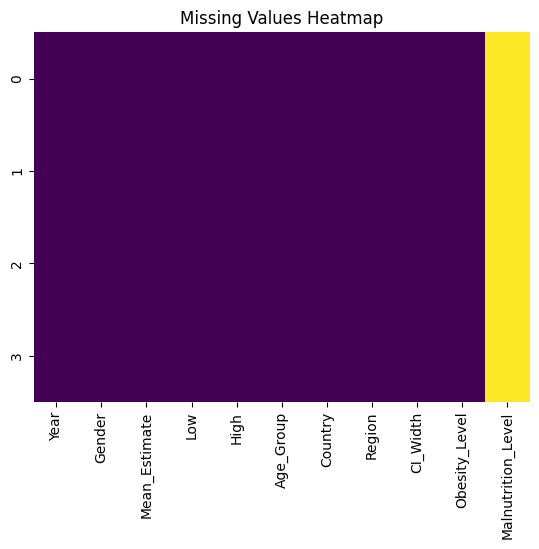

In [163]:
# Count missing values in each column
print(df.isnull().sum())

# Optional: visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


# Checking distribution of Mean_Estimate, CI_Width, etc.

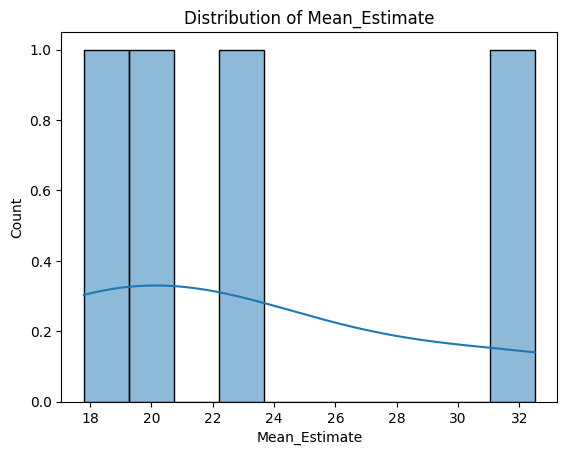

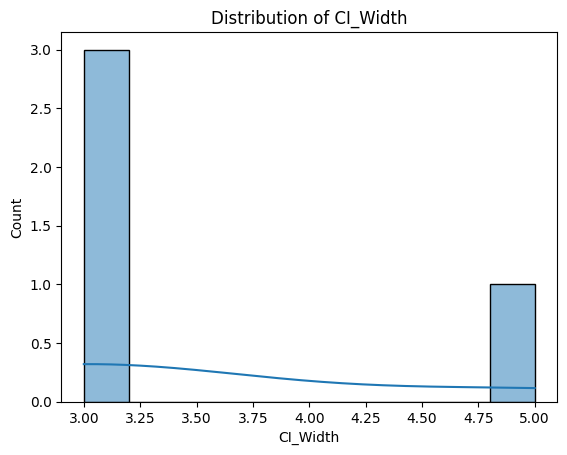

In [164]:
# Histogram of Mean_Estimate
sns.histplot(df['Mean_Estimate'], bins=10, kde=True)
plt.title("Distribution of Mean_Estimate")
plt.show()

# Distribution of CI_Width
sns.histplot(df['CI_Width'], bins=10, kde=True)
plt.title("Distribution of CI_Width")
plt.show()


# *Analyzing trends across years, regions, or demographic groups

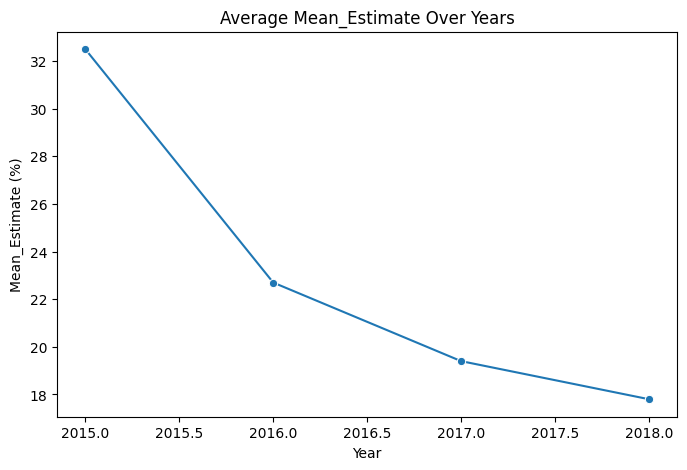

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average Mean_Estimate per year
yearly_trend = df.groupby('Year')['Mean_Estimate'].mean().reset_index()

# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Mean_Estimate', data=yearly_trend, marker='o')
plt.title('Average Mean_Estimate Over Years')
plt.ylabel('Mean_Estimate (%)')
plt.show()


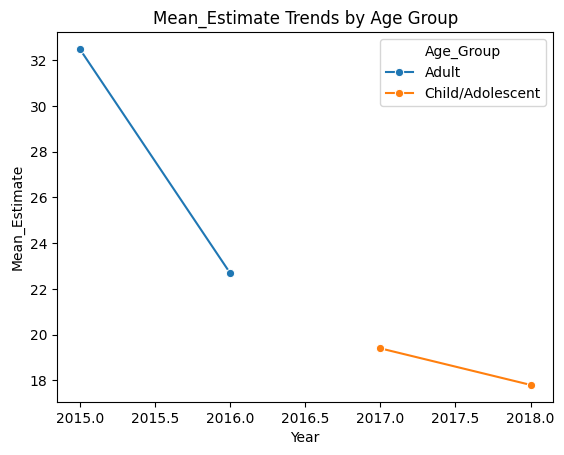

In [166]:
sns.lineplot(x='Year', y='Mean_Estimate', hue='Age_Group', data=df, marker='o')
plt.title('Mean_Estimate Trends by Age Group')
plt.show()

### REGIONS

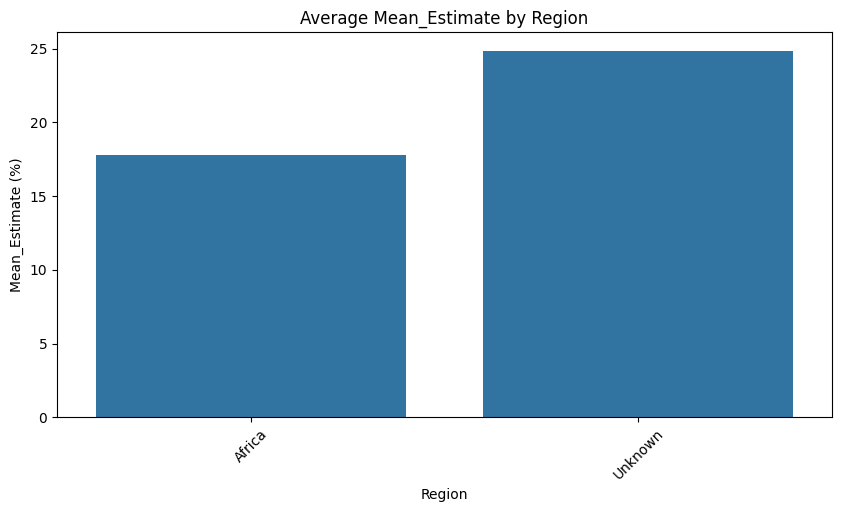

In [167]:
# Average Mean_Estimate per region
region_trend = df.groupby('Region')['Mean_Estimate'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=region_trend.index, y=region_trend.values)
plt.xticks(rotation=45)
plt.title('Average Mean_Estimate by Region')
plt.ylabel('Mean_Estimate (%)')
plt.show()


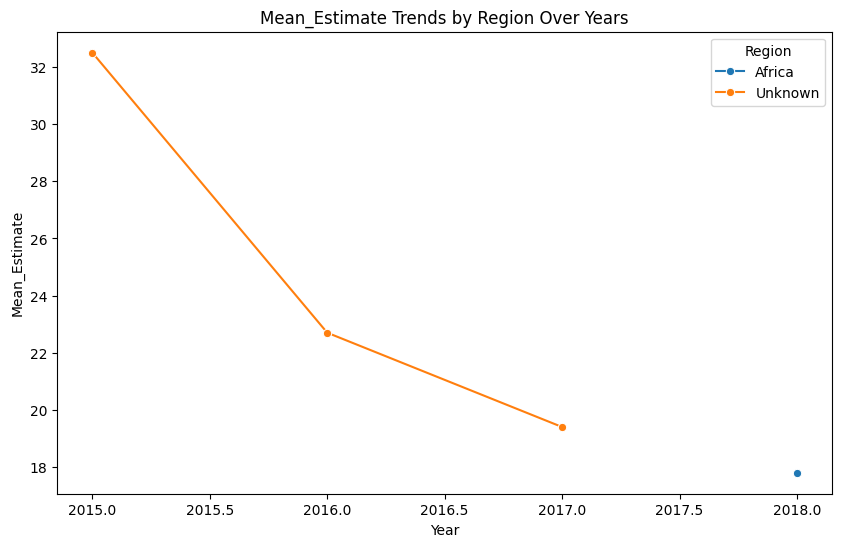

In [168]:
region_year_trend = df.groupby(['Region','Year'])['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Mean_Estimate', hue='Region', data=region_year_trend, marker='o')
plt.title('Mean_Estimate Trends by Region Over Years')
plt.show()

### demographic groups

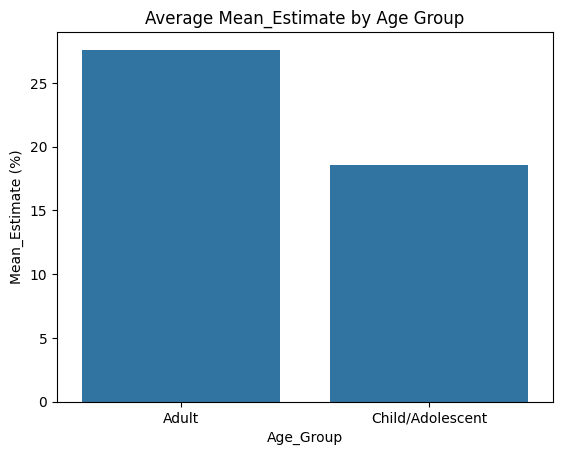

In [169]:
# Average Mean_Estimate by age_group
age_trend = df.groupby('Age_Group')['Mean_Estimate'].mean()

sns.barplot(x=age_trend.index, y=age_trend.values)
plt.title('Average Mean_Estimate by Age Group')
plt.ylabel('Mean_Estimate (%)')
plt.show()

# If malnutrition_level exists
if 'malnutrition_level' in df.columns:
    malnutrition_trend = df.groupby('malnutrition_level')['Mean_Estimate'].mean()
    sns.barplot(x=malnutrition_trend.index, y=malnutrition_trend.values, palette='viridis')
    plt.title('Mean_Estimate by Malnutrition Level')
    plt.ylabel('Mean_Estimate (%)')
    plt.show()

Comparing obesity vs malnutrition distributions

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a label column
df_obesity['Type'] = 'Obesity'
df_malnutrition['Type'] = 'Malnutrition'

# Select relevant columns and rename before concatenating
columns_needed = ['TimeDim', 'NumericValue', 'age_group', 'ParentLocation', 'Type']
df_obesity_cleaned = df_obesity[columns_needed].copy()
df_malnutrition_cleaned = df_malnutrition[columns_needed].copy()

df_obesity_cleaned = df_obesity_cleaned.rename(columns={'TimeDim': 'Year', 'NumericValue': 'Mean_Estimate', 'ParentLocation': 'Region'})
df_malnutrition_cleaned = df_malnutrition_cleaned.rename(columns={'TimeDim': 'Year', 'NumericValue': 'Mean_Estimate', 'ParentLocation': 'Region'})

# Combine them
df_combined = pd.concat([df_obesity_cleaned, df_malnutrition_cleaned], ignore_index=True)

# Distribution Comparison: Histograms / KDE

/tmp/ipython-input-3399129018.py:16: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



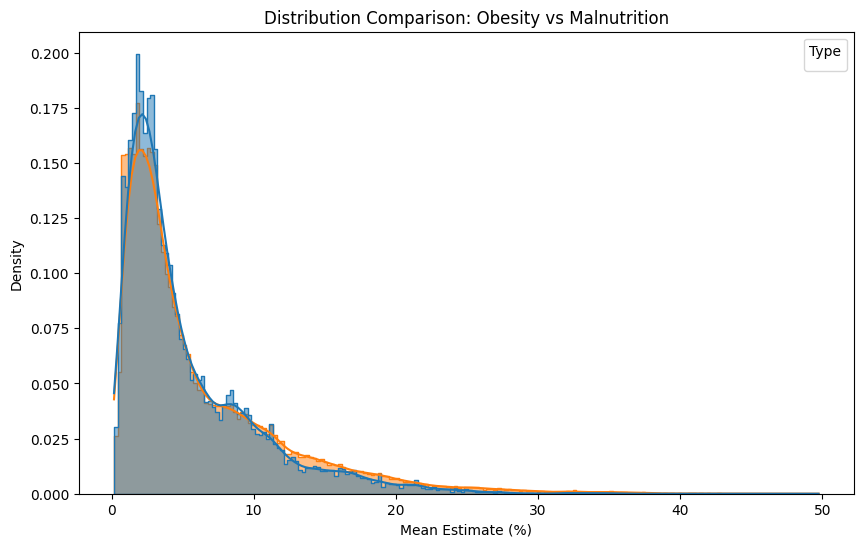

In [171]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_combined,
    x='Mean_Estimate',
    hue='Type',
    kde=True,            # adds KDE curve
    stat='density',      # normalize
    common_norm=False,   # normalize separately
    element='step',
    alpha=0.5
)

plt.title('Distribution Comparison: Obesity vs Malnutrition')
plt.xlabel('Mean Estimate (%)')
plt.ylabel('Density')
plt.legend(title='Type')
plt.show()

### Boxplot Comparison

/tmp/ipython-input-3675771332.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




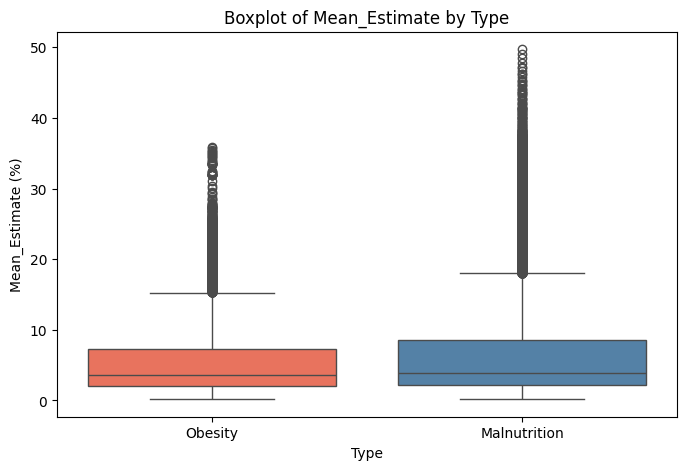

In [172]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Mean_Estimate', data=df_combined, palette=['#FF6347','#4682B4'])
plt.title('Boxplot of Mean_Estimate by Type')
plt.ylabel('Mean_Estimate (%)')
plt.show()

### Regional Comparison

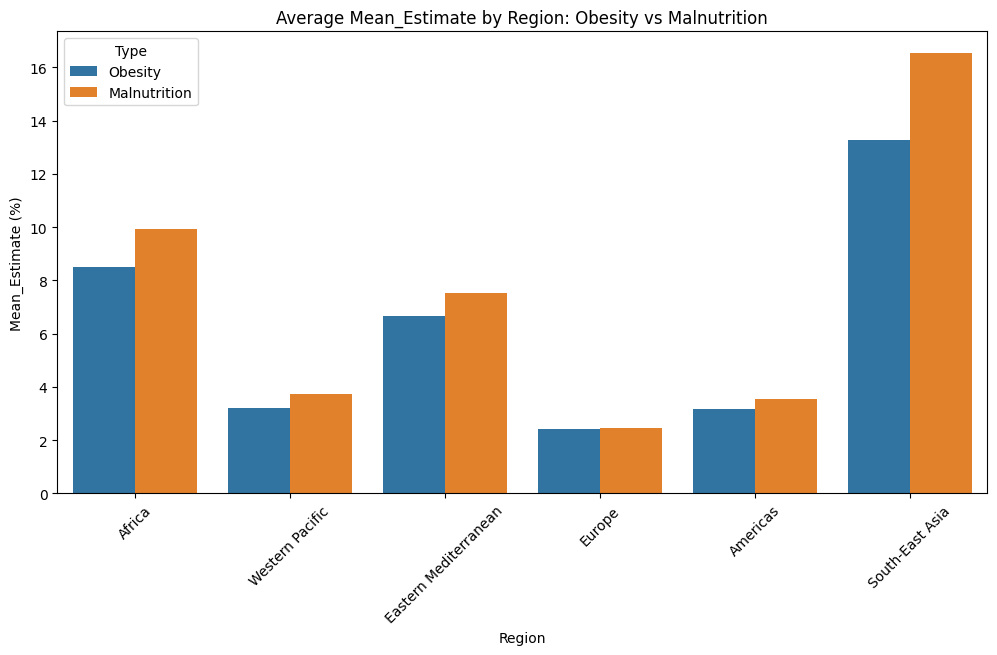

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Mean_Estimate', hue='Type', data=df_combined, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Mean_Estimate by Region: Obesity vs Malnutrition')
plt.ylabel('Mean_Estimate (%)')
plt.show()

Try different visualizations using Matplotlib or Seaborn or Plotly to uncover interesting patterns
* Line plots to explore trends over time

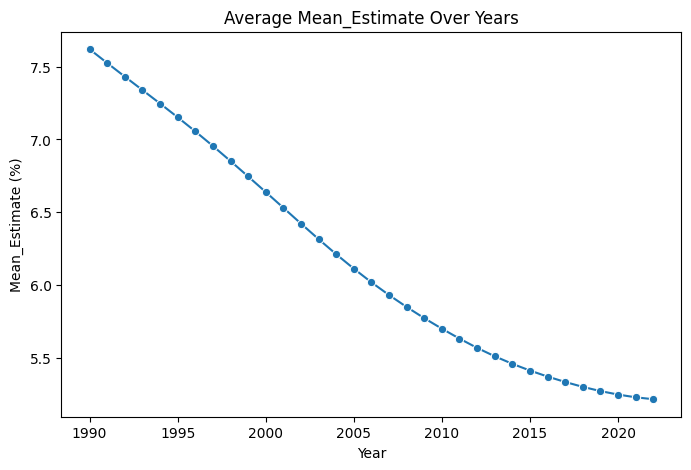

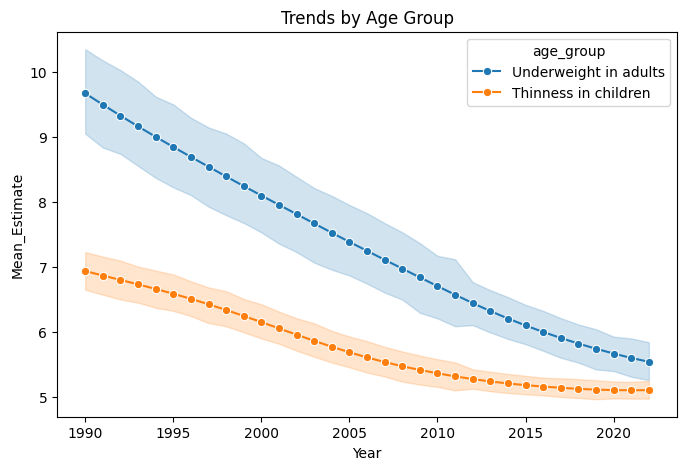

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Mean_Estimate over years
yearly_trend = df_combined.groupby('Year')['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Mean_Estimate', data=yearly_trend, marker='o')
plt.title('Average Mean_Estimate Over Years')
plt.ylabel('Mean_Estimate (%)')
plt.show()

# By age group
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Mean_Estimate', hue='age_group', data=df_combined, marker='o')
plt.title('Trends by Age Group')
plt.show()

* Bar charts to compare top/bottom countries or regions

/tmp/ipython-input-118895701.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




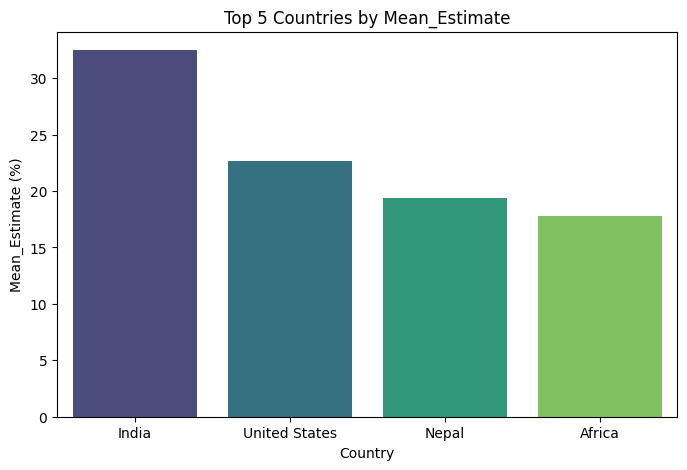

/tmp/ipython-input-118895701.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




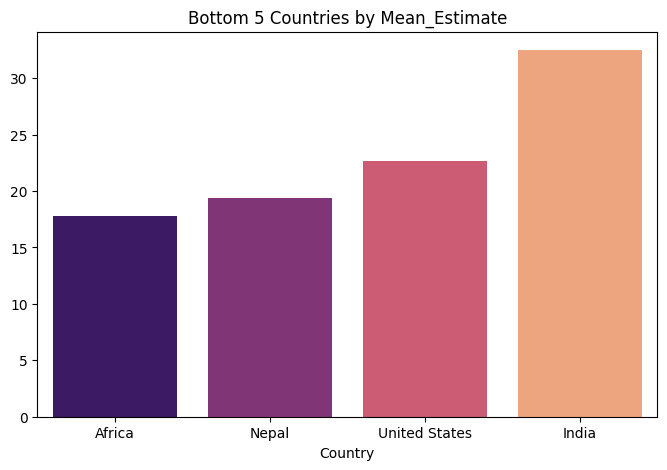

In [175]:
# Top 5 countries with highest Mean_Estimate
top_countries = df.groupby('Country')['Mean_Estimate'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 5 Countries by Mean_Estimate')
plt.ylabel('Mean_Estimate (%)')
plt.show()

# Bottom 5
bottom_countries = df.groupby('Country')['Mean_Estimate'].mean().sort_values().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette='magma')
plt.title('Bottom 5 Countries by Mean_Estimate')
plt.show()

* Box plots to observe variability by region

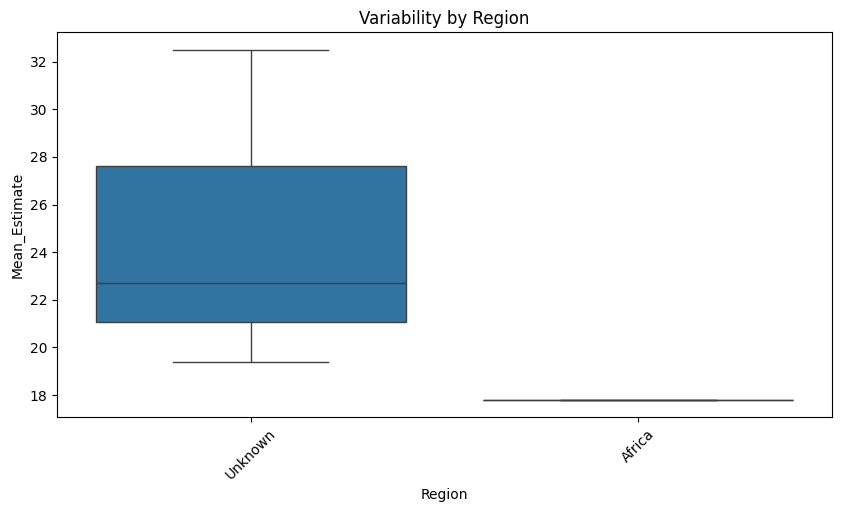

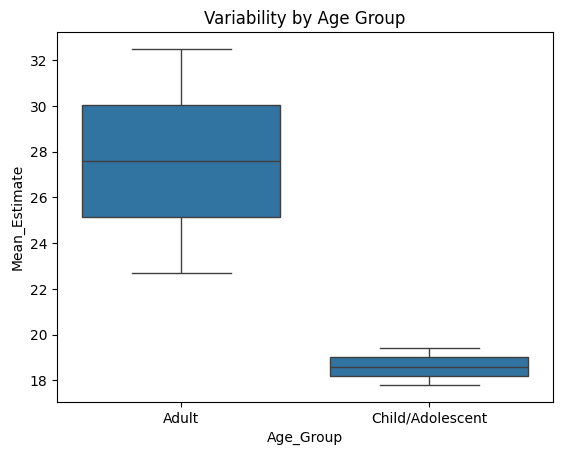

In [176]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='Mean_Estimate', data=df)
plt.title('Variability by Region')
plt.xticks(rotation=45)
plt.show()

# By Age Group
sns.boxplot(x='Age_Group', y='Mean_Estimate', data=df)
plt.title('Variability by Age Group')
plt.show()

# * Heatmaps or scatter plots to identify patterns and outliers

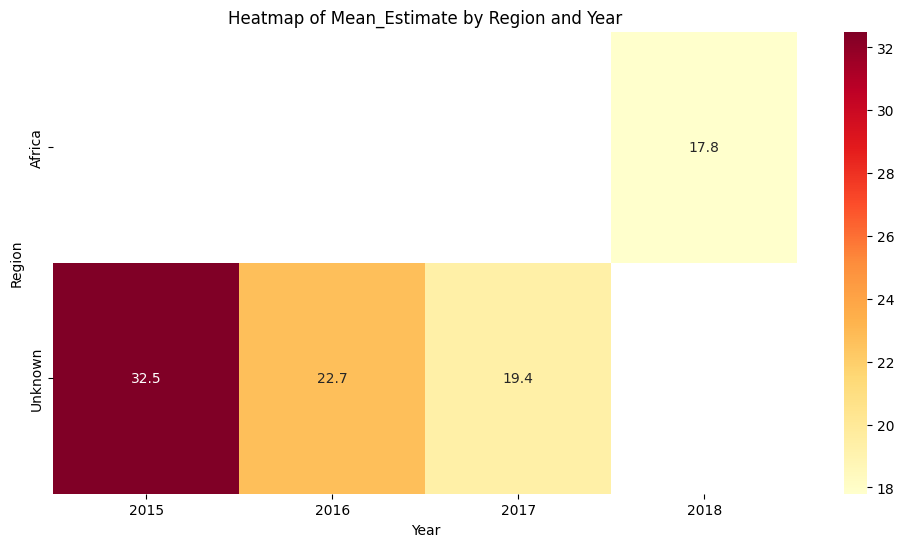

In [177]:
# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Mean_Estimate', index='Region', columns='Year', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Heatmap of Mean_Estimate by Region and Year')
plt.show()

**scatter plots to identify patterns

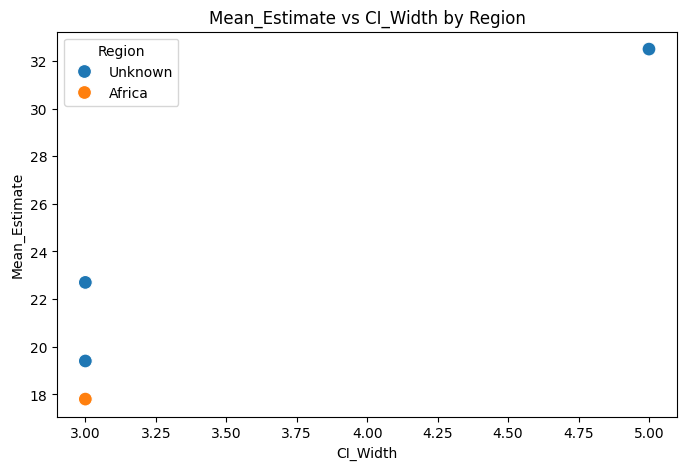

In [178]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CI_Width', y='Mean_Estimate', hue='Region', data=df, s=100)
plt.title('Mean_Estimate vs CI_Width by Region')
plt.show()

** Optional: Plotly Interactive Visuals

In [179]:
import plotly.express as px

# Interactive line plot over years
fig = px.line(df, x='Year', y='Mean_Estimate', color='Age_Group', markers=True, title='Trends Over Time')
fig.show()

# Interactive scatter
fig2 = px.scatter(df, x='CI_Width', y='Mean_Estimate', color='Region', size='Mean_Estimate',
                  hover_data=['Country'], title='Mean_Estimate vs CI_Width')
fig2.show()

***Step 4: Insert Data into SQL
* SQLite
**1. Import Libraries

In [180]:
import sqlite3
import pandas as pd

2. Connect to SQLite Database

In [181]:
# Connect to SQLite (creates 'health_data.db' if not exists)
conn = sqlite3.connect('health_data.db')

# Create a cursor object
cursor = conn.cursor()

3. Create Table (if not exists)

In [182]:
create_table_query = """
CREATE TABLE IF NOT EXISTS health_data (
    Country TEXT,
    Region TEXT,
    Year INTEGER,
    Indicator TEXT,
    Mean_Estimate REAL,
    LowerBound REAL,
    UpperBound REAL,
    Value REAL,
    age_group TEXT,
    CI_Width REAL
);
"""

cursor.execute(create_table_query)
conn.commit()

4. Insert Data from Pandas DataFrame

In [183]:
# Assuming df is your cleaned dataframe
df.to_sql('health_data', conn, if_exists='replace', index=False)

print("Data inserted successfully!")

Data inserted successfully!


5. Query Data to Verify

In [184]:
# Simple query to check inserted data
query_result = pd.read_sql("SELECT * FROM health_data LIMIT 5;", conn)
print(query_result)

   Year  Gender  Mean_Estimate   Low  High         Age_Group        Country  \
0  2015    Male           32.5  30.0  35.0             Adult          India   
1  2016  Female           22.7  21.0  24.0             Adult  United States   
2  2017    Both           19.4  18.0  21.0  Child/Adolescent          Nepal   
3  2018    Male           17.8  16.0  19.0  Child/Adolescent         Africa   

    Region  CI_Width Obesity_Level Malnutrition_Level  
0  Unknown       5.0          High               None  
1  Unknown       3.0           Low               None  
2  Unknown       3.0           Low               None  
3   Africa       3.0           Low               None  


6. Close Connection

In [185]:
conn.close()

**Create 2 tables using Python code
*obesity
*malnutrition


In [186]:
import sqlite3
import pandas as pd

# Example: assuming df_obesity and df_malnutrition are your cleaned 10-column datasets
# df_obesity.head(), df_malnutrition.head() should have columns:
# ['Country', 'Region', 'Year', 'Indicator', 'Mean_Estimate',
#  'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width']

# 1️⃣ Connect to SQLite database
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# 2️⃣ Create obesity table
cursor.execute("""
CREATE TABLE IF NOT EXISTS obesity (
    Country TEXT,
    Region TEXT,
    Year INTEGER,
    Indicator TEXT,
    Mean_Estimate REAL,
    LowerBound REAL,
    UpperBound REAL,
    Value REAL,
    age_group TEXT,
    CI_Width REAL
);
""")

# 3️⃣ Create malnutrition table
cursor.execute("""
CREATE TABLE IF NOT EXISTS malnutrition (
    Country TEXT,
    Region TEXT,
    Year INTEGER,
    Indicator TEXT,
    Mean_Estimate REAL,
    LowerBound REAL,
    UpperBound REAL,
    Value REAL,
    age_group TEXT,
    CI_Width REAL
);
""")

conn.commit()

# 4️⃣ Insert data into obesity table
df_obesity.to_sql('obesity', conn, if_exists='replace', index=False)

# 5️⃣ Insert data into malnutrition table
df_malnutrition.to_sql('malnutrition', conn, if_exists='replace', index=False)

print("Both tables created and data inserted successfully!")

# 6️⃣ Optional: verify
print(pd.read_sql("SELECT * FROM obesity LIMIT 5;", conn))
print(pd.read_sql("SELECT * FROM malnutrition LIMIT 5;", conn))

# 7️⃣ Close connection
conn.close()

Both tables created and data inserted successfully!
     Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0    54   NCD_BMI_18C        COUNTRY        GAB                AFR   
1  2284   NCD_BMI_18C        COUNTRY        MNG                WPR   
2  2599   NCD_BMI_18C        COUNTRY        SLE                AFR   
3  4144   NCD_BMI_18C         REGION       SEAR               None   
4  5041   NCD_BMI_18C        COUNTRY        QAT                EMR   

  TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0        YEAR                 Africa      SEX  SEX_FMLE     2021  ...   
1        YEAR        Western Pacific      SEX  SEX_BTSX     2017  ...   
2        YEAR                 Africa      SEX  SEX_FMLE     2016  ...   
3        YEAR                   None      SEX  SEX_BTSX     2021  ...   
4        YEAR  Eastern Mediterranean      SEX   SEX_MLE     2014  ...   

  NumericValue        Low       High Comments                           Date  \
0     5.

5. Insert Cleaned Data
*Insert rows from your final DataFrames (df_obesity and df_malnutrition) into the respective tables using .iterrows() in a for loop.


In [187]:
import sqlite3
import pandas as pd
import pycountry

# Example: assuming df_obesity and df_malnutrition are your cleaned 10-column datasets
# df_obesity.head(), df_malnutrition.head() should have columns:
# ['Country', 'Region', 'Year', 'Indicator', 'Mean_Estimate',
#  'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width']

# 1️⃣ Connect to SQLite database
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# 2️⃣ Create obesity table
cursor.execute("""
CREATE TABLE IF NOT EXISTS obesity (
    Country TEXT,
    Region TEXT,
    Year INTEGER,
    Gender TEXT,
    Mean_Estimate REAL,
    LowerBound REAL,
    UpperBound REAL,
    Value REAL,
    age_group TEXT,
    CI_Width REAL,
    obesity_level TEXT
);
""")

# 3️⃣ Create malnutrition table
cursor.execute("""
CREATE TABLE IF NOT EXISTS malnutrition (
    Country TEXT,
    Region TEXT,
    Year INTEGER,
    Indicator TEXT,
    Mean_Estimate REAL,
    LowerBound REAL,
    UpperBound REAL,
    Value REAL,
    age_group TEXT,
    CI_Width REAL,
    malnutrition_level TEXT
);
""")

conn.commit()


# Dictionary for special or regional codes
special_regions = {
    'GLOBAL': 'Global',
    'AFR': 'Africa',
    'AMR': 'Americas',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'WB_UMI': 'Upper Middle Income'
}

def convert_country(code):
    if not code:
        return "Unknown"

    code = str(code).upper()

    # 1️⃣ Check special codes
    if code in special_regions:
        return special_regions[code]

    # 2️⃣ Try pycountry for standard ISO 3-letter country codes
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
    except AttributeError:
        pass # Ignore error if code is not alpha_3

    # 3️⃣ Fallback for unmatched codes
    return "Unmatched"

def get_region(code):
    code = str(code).upper()
    return special_regions.get(code, 'Unknown')  # WHO region or 'Unknown'


# Apply cleaning and feature engineering to df_obesity
df_obesity = df_obesity.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country"
})

df_obesity["Country"] = df_obesity["Country"].apply(convert_country)
df_obesity['Region'] = df_obesity['ParentLocationCode'].apply(get_region)
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']

def categorize_obesity(x):
    if x >= 30:
        return 'High'
    elif 25 <= x < 30:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)


# Apply cleaning and feature engineering to df_malnutrition
df_malnutrition = df_malnutrition.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Indicator",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country"
})

df_malnutrition["Country"] = df_malnutrition["Country"].apply(convert_country)
df_malnutrition['Region'] = df_malnutrition['ParentLocationCode'].apply(get_region)
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']

def categorize_malnutrition(x):
    if x >= 20:
        return 'High'
    elif 10 <= x < 20:
        return 'Moderate'
    else:
        return 'Low'

df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate'].apply(categorize_malnutrition)


# Select only the columns needed for the database
obesity_columns = ['Country', 'Region', 'Year', 'Gender', 'Mean_Estimate',
                   'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width', 'obesity_level']
malnutrition_columns = ['Country', 'Region', 'Year', 'Indicator', 'Mean_Estimate',
                        'LowerBound', 'UpperBound', 'Value', 'age_group', 'CI_Width', 'malnutrition_level']

df_obesity = df_obesity[obesity_columns]
df_malnutrition = df_malnutrition[malnutrition_columns]


# 4️⃣ Insert data into obesity table
df_obesity.to_sql('obesity', conn, if_exists='replace', index=False)

# 5️⃣ Insert data into malnutrition table
df_malnutrition.to_sql('malnutrition', conn, if_exists='replace', index=False)

print("✅ Both tables created and data inserted successfully using to_sql()!")

# 6️⃣ Optional: verify
print(pd.read_sql("SELECT * FROM obesity LIMIT 5;", conn))
print(pd.read_sql("SELECT * FROM malnutrition LIMIT 5;", conn))

# 7️⃣ Close connection
conn.close()

✅ Both tables created and data inserted successfully using to_sql()!
                  Country                        Region  Year    Gender  \
0                   Gabon                        Africa  2021  SEX_FMLE   
1                Mongolia        Western Pacific Region  2017  SEX_BTSX   
2            Sierra Leone                        Africa  2016  SEX_FMLE   
3  South-East Asia Region                       Unknown  2021  SEX_BTSX   
4                   Qatar  Eastern Mediterranean Region  2014   SEX_MLE   

   Mean_Estimate  LowerBound  UpperBound             Value  \
0       5.795110    3.972036    8.077021     5.8 [4.0-8.1]   
1       3.090652    2.428230    3.842155     3.1 [2.4-3.8]   
2       8.371724    6.655668   10.253121    8.4 [6.7-10.3]   
3      13.336353   12.242323   14.442866  13.3 [12.2-14.4]   
4       2.208070    1.253843    3.516819     2.2 [1.3-3.5]   

               age_group  CI_Width obesity_level  
0  Underweight in adults  4.104985           Low  
1  Un

### Step 4: Query Writing Streamlit
🧋 Obesity Table (10 Queries)

# 1. Top 5 regions with the highest average obesity levels in the most recent year(2022)

In [193]:
import sqlite3
import pandas as pd
import streamlit as st

# Connect to SQLite database
conn = sqlite3.connect('health_data.db')

# SQL query to find top 5 regions
query = """
SELECT Region, AVG(Mean_Estimate) AS Avg_Obesity
FROM obesity
WHERE Year = 2022
GROUP BY Region
ORDER BY Avg_Obesity DESC
LIMIT 5;
"""

# Execute query and show results
top5_regions = pd.read_sql(query, conn)

st.write("🌍 **Top 5 Regions with Highest Average Obesity Levels in 2022**")
st.dataframe(top5_regions)
st.bar_chart(top5_regions.set_index("Region"))

2025-10-24 11:10:29.900 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.320 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-24 11:10:30.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 11:10:30.913 Thread 'MainThread': mi

DeltaGenerator()

2. Top 5 countries with highest obesity estimates

In [ ]:
conn = sqlite3.connect('health_data.db')
query = """
SELECT
    Country,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
FROM obesity
GROUP BY Country
ORDER BY Avg_Obesity_Level DESC
LIMIT 5;
"""

top5_countries = pd.read_sql(query, conn)

# Display results
print("🌍 Top 5 Countries with Highest Average Obesity Estimates:")
print(top5_countries)

conn.close()

3. Obesity trend in India over the years(Mean_estimate)

In [ ]:
# Connect to the database
conn = sqlite3.connect('health_data.db')

# Run query
query = """
SELECT
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
FROM obesity
WHERE Country = 'India'
GROUP BY Year
ORDER BY Year ASC;
"""

india_trend = pd.read_sql(query, conn)

# Display data
print("📊 Obesity Trend in India Over the Years:")
print(india_trend)

# Plot tr

4. Average obesity by gender

In [ ]:
# Connect to SQLite
conn = sqlite3.connect('health_data.db')

# Run query
query = """
SELECT
    Gender,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
FROM obesity
GROUP BY Gender
ORDER BY Avg_Obesity_Level DESC;
"""

gender_obesity = pd.read_sql(query, conn)

# Display table
print("⚖️ Average Obesity by Gender:")
print(gender_obesity)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(gender_obesity['Gender'], gender_obesity['Avg_Obesity_Level'], color='skyblue')
plt.title('Average Obesity by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Average Obesity Level (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

5. Country count by obesity level category and age group


In [ ]:
# Connect to DB
conn = sqlite3.connect('health_data.db')

query = """
WITH categorized AS (
    SELECT
        Country,
        age_group,
        CASE
            WHEN Mean_Estimate < 10 THEN 'Low'
            WHEN Mean_Estimate BETWEEN 10 AND 20 THEN 'Moderate'
            WHEN Mean_Estimate BETWEEN 20 AND 30 THEN 'High'
            ELSE 'Very High'
        END AS Obesity_Level_Category
    FROM obesity
    WHERE Year = 2022
)
SELECT
    Obesity_Level_Category,
    age_group,
    COUNT(DISTINCT Country) AS Country_Count
FROM categorized
GROUP BY Obesity_Level_Category, age_group
ORDER BY
    CASE
        WHEN Obesity_Level_Category = 'Low' THEN 1
        WHEN Obesity_Level_Category = 'Moderate' THEN 2
        WHEN Obesity_Level_Category = 'High' THEN 3
        WHEN Obesity_Level_Category = 'Very High' THEN 4
    END,
    age_group;
"""

obesity_category = pd.read_sql(query, conn)

print("🏳️ Country Count by Obesity Level Category and Age Group (2022):")
print(obesity_category)

# Visualize
plt.figure(figsize=(8,5))
for group in obesity_category['age_group'].unique():
    subset = obesity_category[obesity_category['age_group'] == group]
    plt.bar(subset['Obesity_Level_Category'], subset['Country_Count'], label=group)

plt.title('Country Count by Obesity Level Category and Age Group (2022)')
plt.xlabel('Obesity Level Category')
plt.ylabel('Number of Countries')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6) # Fixed the incomplete line
plt.show()

conn.close()

6. Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)

In [ ]:
# Connect to the database
conn = sqlite3.connect('health_data.db')

# Top 5 least reliable (highest CI_Width)
query_least_reliable = """
SELECT
    Country,
    ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
FROM obesity
GROUP BY Country
ORDER BY Avg_CI_Width DESC
LIMIT 5;
"""

least_reliable = pd.read_sql(query_least_reliable, conn)

# Top 5 most consistent (lowest CI_Width)
query_most_consistent = """
SELECT
    Country,
    ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
FROM obesity
GROUP BY Country
ORDER BY Avg_CI_Width ASC
LIMIT 5;
"""

most_consistent = pd.read_sql(query_most_consistent, conn)

print("⚠️ Top 5 Least Reliable Countries (Highest Average CI_Width):")
print(least_reliable)
print("\n✅ Top 5 Most Consistent Countries (Lowest Average CI_Width):")
print(most_consistent)

conn.close()

7. Average obesity by age group

In [ ]:
conn = sqlite3.connect('health_data.db')
query = """
SELECT
    Age_Group,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
FROM obesity
GROUP BY Age_Group
ORDER BY Avg_Obesity_Level DESC;
"""

age_obesity = pd.read_sql(query, conn)

plt.figure(figsize=(6, 4))
plt.bar(age_obesity['age_group'], age_obesity['Avg_Obesity_Level'], color=['lightcoral', 'skyblue'])
plt.title('Average Obesity by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Obesity Level (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# st.dataframe(age_obesity) # This line is commented out to avoid error in Colab environment
conn.close()

8. Top 10 Countries with consistent low obesity (low average + low CI)over the years

In [ ]:
# Connect to DB
conn = sqlite3.connect('health_data.db')

# Query top 10 countries with consistently low obesity & low CI_Width
query = """
SELECT
    Country,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level,
    ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
FROM obesity
GROUP BY Country
HAVING Avg_Obesity_Level IS NOT NULL
ORDER BY Avg_Obesity_Level ASC, Avg_CI_Width ASC
LIMIT 10;
"""

consistent_low_obesity = pd.read_sql(query, conn)

# Display results
print("🌿 Top 10 Countries with Consistent Low Obesity and High Data Reliability:")
print(consistent_low_obesity)

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(
    consistent_low_obesity['Avg_Obesity_Level'],
    consistent_low_obesity['Avg_CI_Width'],
    color='mediumseagreen',
    s=80
)
for i, row in consistent_low_obesity.iterrows():
    plt.text(row['Avg_Obesity_Level']+0.1, row['Avg_CI_Width']+0.001, row['Country'], fontsize=9)

plt.title('Top 10 Consistently Low-Obesity Countries (Low Mean + Low CI)', fontsize=13)
plt.xlabel('Average Obesity Level (%)')
plt.ylabel('Average CI Width')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

conn.close()

9. Countries where female obesity exceeds male by large margin (same       year)

In [ ]:
# Connect to database
conn = sqlite3.connect('health_data.db')

query = """
SELECT
    f.Country,
    f.Year,
    ROUND(f.Mean_Estimate, 2) AS Female_Obesity,
    ROUND(m.Mean_Estimate, 2) AS Male_Obesity,
    ROUND(f.Mean_Estimate - m.Mean_Estimate, 2) AS Difference
FROM obesity f
JOIN obesity m
    ON f.Country = m.Country
    AND f.Year = m.Year
WHERE f.Gender LIKE '%FMLE%'
  AND m.Gender LIKE '%MLE%'
  AND (f.Mean_Estimate - m.Mean_Estimate) > 5
ORDER BY Difference DESC
LIMIT 10;
"""

gender_gap = pd.read_sql(query, conn)

print("💃 Countries Where Female Obesity Exceeds Male by Large Margin:")
print(gender_gap)

conn.close()

10. Global average obesity percentage per year

In [ ]:
# Connect to database
conn = sqlite3.connect('health_data.db')

# Query global average obesity per year
query = """
SELECT
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Global_Avg_Obesity
FROM obesity
GROUP BY Year
ORDER BY Year ASC;
"""

global_trend = pd.read_sql(query, conn)

# Display results
print("🌍 Global Average Obesity Percentage Per Year:")
print(global_trend)

# Plot trend
plt.figure(figsize=(8,5))
plt.plot(global_trend['Year'], global_trend['Global_Avg_Obesity'], marker='o', color='mediumblue')
plt.title('Global Average Obesity Percentage Per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Obesity (%)')
plt.grid(True)
plt.show()

conn.close()

### 👾 Malnutrition Table (10 Queries)

1. Avg. malnutrition by age group

In [ ]:
# Connect to database
conn = sqlite3.connect('health_data.db')

# Query average malnutrition by age group
query = """
SELECT
    age_group,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY age_group
ORDER BY Avg_Malnutrition DESC;
"""

age_malnutrition = pd.read_sql(query, conn)

# Display results
print("👶🧍 Average Malnutrition by Age Group:")
print(age_malnutrition)

# Plot visualization
plt.figure(figsize=(6,4))
plt.bar(age_malnutrition['age_group'], age_malnutrition['Avg_Malnutrition'], color=['orange','skyblue'])
plt.title('Average Malnutrition by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Malnutrition (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

2. Top 5 countries with highest malnutrition(mean_estimate)

In [ ]:
# Connect to database
conn = sqlite3.connect('health_data.db')

# Query top 5 countries with highest malnutrition
query = """
SELECT
    Country,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY Country
ORDER BY Avg_Malnutrition DESC
LIMIT 5;
"""

top5_malnutrition = pd.read_sql(query, conn)

print("⚠️ Top 5 Countries with Highest Malnutrition Rates:")
print(top5_malnutrition)

conn.close()

3. Malnutrition trend in African region over the years

In [ ]:
# Connect to database
conn = sqlite3.connect('health_data.db')

# Query African malnutrition trend
query = """
SELECT
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
WHERE Region LIKE '%Africa%'
GROUP BY Year
ORDER BY Year ASC;
"""

africa_trend = pd.read_sql(query, conn)

# Display results
print("📊 Malnutrition Trend in African Region Over the Years:")
print(africa_trend)

# Plot trend
plt.figure(figsize=(8,5))
plt.plot(africa_trend['Year'], africa_trend['Avg_Malnutrition'], marker='o', color='orangered')
plt.title('Malnutrition Trend in African Region Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Malnutrition (%)')
plt.grid(True)
plt.show()

conn.close()

4. Gender-based average malnutrition

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query average malnutrition by gender
query = """
SELECT
    Indicator AS Gender,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY Indicator
ORDER BY Avg_Malnutrition DESC;
"""

gender_malnutrition = pd.read_sql(query, conn)

# Display results
print("⚖️ Average Malnutrition by Gender:")
print(gender_malnutrition)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(gender_malnutrition['Gender'], gender_malnutrition['Avg_Malnutrition'], color=['orange','skyblue'])
plt.title('Average Malnutrition by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Average Malnutrition (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

5. Malnutrition level-wise (average CI_Width by age group)

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query average CI_Width by age group
query = """
SELECT
    age_group,
    ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
FROM malnutrition
GROUP BY age_group
ORDER BY Avg_CI_Width ASC;
"""

ci_by_age = pd.read_sql(query, conn)

print("📏 Average CI_Width by Age Group (Malnutrition):")
print(ci_by_age)

# Plot
plt.figure(figsize=(6,4))
plt.bar(ci_by_age['age_group'], ci_by_age['Avg_CI_Width'], color=['lightgreen','salmon'])
plt.title('Average CI_Width by Age Group (Malnutrition)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average CI Width')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

6. Yearly malnutrition change in specific countries(India, Nigeria, Brazil

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query yearly malnutrition for selected countries
query = """
SELECT
    Country,
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
WHERE Country IN ('India', 'Nigeria', 'Brazil')
GROUP BY Country, Year
ORDER BY Country, Year ASC;
"""

country_trends = pd.read_sql(query, conn)

print("📊 Yearly Malnutrition Trend in India, Nigeria, and Brazil:")
print(country_trends)

# Plot trend
plt.figure(figsize=(8,5))
for country in country_trends['Country'].unique():
    subset = country_trends[country_trends['Country'] == country]
    plt.plot(subset['Year'], subset['Avg_Malnutrition'], marker='o', label=country)

plt.title('Yearly Malnutrition Trend in Selected Countries', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Malnutrition (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

conn.close()

7. Regions with lowest malnutrition averages

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query regions with lowest malnutrition averages
query = """
SELECT
    Region,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY Region
ORDER BY Avg_Malnutrition ASC
LIMIT 5;
"""

lowest_regions = pd.read_sql(query, conn)

print("🌿 Regions with Lowest Average Malnutrition:")
print(lowest_regions)

# Plot bar chart
plt.figure(figsize=(8,4))
plt.bar(lowest_regions['Region'], lowest_regions['Avg_Malnutrition'], color='lightgreen')
plt.title('Regions with Lowest Average Malnutrition', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Average Malnutrition (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

8. Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX()   on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query countries with increasing malnutrition
query = """
SELECT
    Country,
    ROUND(MIN(Mean_Estimate), 2) AS Min_Malnutrition,
    ROUND(MAX(Mean_Estimate), 2) AS Max_Malnutrition,
    ROUND(MAX(Mean_Estimate) - MIN(Mean_Estimate), 2) AS Increase
FROM malnutrition
GROUP BY Country
HAVING (MAX(Mean_Estimate) - MIN(Mean_Estimate)) > 0
ORDER BY Increase DESC
LIMIT 10;
"""

increasing_malnutrition = pd.read_sql(query, conn)

print("📈 Countries with Increasing Malnutrition Over the Years:")
print(increasing_malnutrition)

conn.close()

9.  Min/Max malnutrition levels year-wise comparison

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query year-wise min/max malnutrition
query = """
SELECT
    Year,
    ROUND(MIN(Mean_Estimate), 2) AS Min_Malnutrition,
    ROUND(MAX(Mean_Estimate), 2) AS Max_Malnutrition
FROM malnutrition
GROUP BY Year
ORDER BY Year ASC;
"""

yearly_range = pd.read_sql(query, conn)

print("📊 Year-wise Min/Max Malnutrition Levels:")
print(yearly_range)

# Plot min/max trend
plt.figure(figsize=(8,5))
plt.plot(yearly_range['Year'], yearly_range['Min_Malnutrition'], marker='o', label='Min Malnutrition', color='green')
plt.plot(yearly_range['Year'], yearly_range['Max_Malnutrition'], marker='o', label='Max Malnutrition', color='red')
plt.fill_between(yearly_range['Year'], yearly_range['Min_Malnutrition'], yearly_range['Max_Malnutrition'], color='orange', alpha=0.2)
plt.title('Year-wise Min/Max Malnutrition Levels', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Malnutrition (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

conn.close()

10.  High CI_Width flags for monitoring(CI_width > 5)

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query high CI_Width records
query = """
SELECT
    Country,
    Year,
    age_group,
    Indicator,
    Mean_Estimate,
    CI_Width
FROM malnutrition
WHERE CI_Width > 5
ORDER BY CI_Width DESC;
"""

high_ci_flags = pd.read_sql(query, conn)

print("⚠️ Malnutrition Records with High CI_Width (>5):")
print(high_ci_flags.head(20))  # show top 20 records for monitoring

conn.close()

🔗 Combined (5 Queries)

1. Obesity vs malnutrition comparison by country(any 5 countries)

In [ ]:
conn = sqlite3.connect('health_data.db')

# Query average obesity vs malnutrition for selected countries
query = """
SELECT
    o.Country,
    ROUND(AVG(o.Mean_Estimate), 2) AS Avg_Obesity,
    ROUND(AVG(m.Mean_Estimate), 2) AS Avg_Malnutrition
FROM obesity o
JOIN malnutrition m
    ON o.Country = m.Country
WHERE o.Country IN ('India','Nigeria','Brazil','USA','China')
GROUP BY o.Country
ORDER BY o.Country;
"""

comparison = pd.read_sql(query, conn)

print("🔗 Obesity vs Malnutrition Comparison (Selected Countries):")
print(comparison)

# Plot comparison
plt.figure(figsize=(8,5))
bar_width = 0.35
countries = comparison['Country']
index = range(len(countries))

plt.bar(index, comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
plt.bar([i + bar_width for i in index], comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

plt.xlabel('Country')
plt.ylabel('Average Percentage (%)')
plt.title('Obesity vs Malnutrition Comparison')
plt.xticks([i + bar_width/2 for i in index], countries)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

2. Gender-based disparity in both obesity and malnutrition

In [ ]:
conn = sqlite3.connect('health_data.db')

# Obesity by gender
query_obesity = """
SELECT
    Gender AS Gender,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
FROM obesity
GROUP BY Gender;
"""
obesity_gender = pd.read_sql(query_obesity, conn)

# Malnutrition by gender
query_malnutrition = """
SELECT
    Indicator AS Gender,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY Indicator;
"""
malnutrition_gender = pd.read_sql(query_malnutrition, conn)

# Merge for comparison
gender_comparison = pd.merge(obesity_gender, malnutrition_gender, on='Gender', how='outer')
print("⚖️ Gender-Based Disparity in Obesity and Malnutrition:")
print(gender_comparison)

# Plot comparison
plt.figure(figsize=(8,5))
bar_width = 0.35
genders = gender_comparison['Gender']
index = range(len(genders))

plt.bar(index, gender_comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
plt.bar([i + bar_width for i in index], gender_comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Average Percentage (%)')
plt.title('Gender-Based Disparity: Obesity vs Malnutrition')
plt.xticks([i + bar_width/2 for i in index], genders)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

3. Region-wise avg estimates side-by-side(Africa and America)

In [ ]:
conn = sqlite3.connect('health_data.db')

# Obesity averages for Africa and Americas
query_obesity = """
SELECT
    Region,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
FROM obesity
WHERE Region IN ('Africa', 'Americas')
GROUP BY Region;
"""
obesity_region = pd.read_sql(query_obesity, conn)

# Malnutrition averages for Africa and Americas
query_malnutrition = """
SELECT
    Region,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
WHERE Region IN ('Africa', 'Americas')
GROUP BY Region;
"""
malnutrition_region = pd.read_sql(query_malnutrition, conn)

# Merge for side-by-side comparison
region_comparison = pd.merge(obesity_region, malnutrition_region, on='Region')
print("🌍 Region-Wise Average Estimates: Obesity vs Malnutrition")
print(region_comparison)

# Plot comparison
plt.figure(figsize=(6,5))
bar_width = 0.35
regions = region_comparison['Region']
index = range(len(regions))

plt.bar(index, region_comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
plt.bar([i + bar_width for i in index], region_comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

plt.xlabel('Region')
plt.ylabel('Average Percentage (%)')
plt.title('Region-Wise Average Estimates: Obesity vs Malnutrition')
plt.xticks([i + bar_width/2 for i in index], regions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

conn.close()

4. Countries with obesity up & malnutrition down

In [ ]:
conn = sqlite3.connect('health_data.db')

query = """
WITH ObesityTrend AS (
    SELECT
        Country,
        MAX(Mean_Estimate) - MIN(Mean_Estimate) AS Obesity_Change
    FROM obesity
    GROUP BY Country
),
MalnutritionTrend AS (
    SELECT
        Country,
        MAX(Mean_Estimate) - MIN(Mean_Estimate) AS Malnutrition_Change
    FROM malnutrition
    GROUP BY Country
)
SELECT
    o.Country,
    ROUND(o.Obesity_Change, 2) AS Obesity_Change,
    ROUND(m.Malnutrition_Change, 2) AS Malnutrition_Change
FROM ObesityTrend o
JOIN MalnutritionTrend m
    ON o.Country = m.Country
WHERE o.Obesity_Change > 0 AND m.Malnutrition_Change < 0
ORDER BY o.Obesity_Change DESC
LIMIT 10;
"""

trend_comparison = pd.read_sql(query, conn)
print("📈 Countries with Increasing Obesity & Decreasing Malnutrition:")
print(trend_comparison)

conn.close()

5. Age-wise trend analysis

In [ ]:
conn = sqlite3.connect('health_data.db')

# Obesity age-wise trend
query_obesity = """
SELECT
    age_group,
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
FROM obesity
GROUP BY age_group, Year
ORDER BY age_group, Year;
"""
obesity_age_trend = pd.read_sql(query_obesity, conn)

# Malnutrition age-wise trend
query_malnutrition = """
SELECT
    age_group,
    Year,
    ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
FROM malnutrition
GROUP BY age_group, Year
ORDER BY age_group, Year;
"""
malnutrition_age_trend = pd.read_sql(query_malnutrition, conn)

# Plot Obesity Trend
plt.figure(figsize=(8,5))
for age_group in obesity_age_trend['age_group'].unique():
    subset = obesity_age_trend[obesity_age_trend['age_group'] == age_group]
    plt.plot(subset['Year'], subset['Avg_Obesity'], marker='o', label=f'Obesity - {age_group}')

# Plot Malnutrition Trend
for age_group in malnutrition_age_trend['age_group'].unique():
    subset = malnutrition_age_trend[malnutrition_age_trend['age_group'] == age_group]
    plt.plot(subset['Year'], subset['Avg_Malnutrition'], marker='x', linestyle='--', label=f'Malnutrition - {age_group}')

plt.title('Age-Wise Trend Analysis: Obesity vs Malnutrition', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Percentage (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

conn.close()

### Streamlit

In [191]:
%%writefile app.py
import streamlit as st
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import subprocess
import sys
import seaborn as sns

# --- Connect to SQLite database ---
conn = sqlite3.connect('health_data.db')

# --- Sidebar options ---
st.sidebar.title("Health Data Explorer")
dataset_choice = st.sidebar.selectbox("Select Dataset", ["Obesity", "Malnutrition"])
eda_choice = st.sidebar.selectbox("Select Analysis", [
    "Top Countries",
    "Trend Over Years",
    "Gender Comparison",
    "Age-wise Trend",
    "Region-wise Comparison",
    "Distribution Comparison", # Added distribution comparison
    "Queries"
])

# --- Function to load data ---
def load_data(table):
    return pd.read_sql(f"SELECT * FROM {table};", conn)

# --- Display dataset ---
if eda_choice != "Queries":
    st.title(f"{dataset_choice} Dataset")
    df = load_data(dataset_choice.lower())
    st.dataframe(df.head(10))


# --- Analysis: Top Countries ---
if eda_choice == "Top Countries":
    query = f"""
    SELECT Country, ROUND(AVG(Mean_Estimate), 2) AS Avg_Value
    FROM {dataset_choice.lower()}
    GROUP BY Country
    ORDER BY Avg_Value DESC
    LIMIT 10;
    """
    result = pd.read_sql(query, conn)
    st.subheader("Top 10 Countries by Average Value")
    st.dataframe(result)

# --- Analysis: Trend Over Years ---
elif eda_choice == "Trend Over Years":
    query = f"""
    SELECT Year, ROUND(AVG(Mean_Estimate), 2) AS Avg_Value
    FROM {dataset_choice.lower()}
    GROUP BY Year
    ORDER BY Year ASC;
    """
    trend = pd.read_sql(query, conn)
    st.subheader("Trend Over Years")
    st.line_chart(trend.rename(columns={"Year": "index"}).set_index("index"))

# --- Analysis: Gender Comparison ---
elif eda_choice == "Gender Comparison":
    query = f"""
    SELECT Indicator AS Gender, ROUND(AVG(Mean_Estimate), 2) AS Avg_Value
    FROM {dataset_choice.lower()}
    GROUP BY Indicator;
    """
    gender_df = pd.read_sql(query, conn)
    st.subheader("Gender-Based Comparison")
    st.bar_chart(gender_df.set_index("Gender"))

# --- Analysis: Age-wise Trend ---
elif eda_choice == "Age-wise Trend":
    query = f"""
    SELECT age_group, Year, ROUND(AVG(Mean_Estimate), 2) AS Avg_Value
    FROM {dataset_choice.lower()}
    GROUP BY age_group, Year
    ORDER BY age_group, Year;
    """
    age_trend = pd.read_sql(query, conn)
    st.subheader("Age-wise Trend Over Years")
    plt.figure(figsize=(8,5))
    for age_group in age_trend['age_group'].unique():
        subset = age_trend[age_trend['age_group'] == age_group]
        plt.plot(subset['Year'], subset['Avg_Value'], marker='o', label=age_group)
    plt.title(f"{dataset_choice} Trend by Age Group")
    plt.xlabel("Year")
    plt.ylabel("Average Percentage (%)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    st.pyplot(plt)

# --- Analysis: Region-wise Comparison ---
elif eda_choice == "Region-wise Comparison":
    query = f"""
    SELECT Region, ROUND(AVG(Mean_Estimate), 2) AS Avg_Value
    FROM {dataset_choice.lower()}
    GROUP BY Region
    ORDER BY Avg_Value DESC;
    """
    region_df = pd.read_sql(query, conn)
    st.subheader("Region-wise Average")
    st.bar_chart(region_df.set_index("Region"))

# --- Analysis: Distribution Comparison (Obesity vs Malnutrition) ---
elif eda_choice == "Distribution Comparison":
    st.subheader("Distribution Comparison: Obesity vs Malnutrition")
    obesity_df = load_data("obesity")
    malnutrition_df = load_data("malnutrition")

    # Add a 'Type' column to each dataframe
    obesity_df['Type'] = 'Obesity'
    malnutrition_df['Type'] = 'Malnutrition'

    # Combine the dataframes
    df_combined = pd.concat([obesity_df, malnutrition_df], ignore_index=True)

    # Histogram/KDE plot
    plt.figure(figsize=(10,6))
    sns.histplot(
        data=df_combined,
        x='Mean_Estimate',
        hue='Type',
        kde=True,
        stat='density',
        common_norm=False,
        element='step',
        alpha=0.5
    )
    plt.title('Distribution Comparison: Obesity vs Malnutrition')
    plt.xlabel('Mean Estimate (%)')
    plt.ylabel('Density')
    plt.legend(title='Type') # Added legend title
    st.pyplot(plt)

    # Boxplot
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Type', y='Mean_Estimate', data=df_combined, palette=['#FF6347','#4682B4'])
    plt.title('Boxplot of Mean_Estimate by Type')
    plt.ylabel('Mean_Estimate (%)')
    st.pyplot(plt)

    # Regional Comparison
    plt.figure(figsize=(12,6))
    sns.barplot(x='Region', y='Mean_Estimate', hue='Type', data=df_combined, errorbar=None)
    plt.xticks(rotation=45)
    plt.title('Average Mean_Estimate by Region: Obesity vs Malnutrition')
    plt.ylabel('Mean_Estimate (%)')
    st.pyplot(plt)


# --- Analysis: Run Queries ---
elif eda_choice == "Queries":
    st.subheader("Run Predefined Queries")
    option = st.selectbox(
       "Select your query",[
           '1.Top 5 regions with the highest average obesity levels in the most recent year(2022)',
           '2.Top 5 countries with highest obesity estimates',
           '3.Obesity trend in India over the years(Mean_estimate)',
           '4.Average obesity by gender',
           '5.Country count by obesity level category and age group',
           '6.Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)',
           '7.Average obesity by age group',
           '8.Top 10 Countries with consistent low obesity (low average + low CI)over the years',
           '9.Countries where female obesity exceeds male by large margin (same       year)',
           '10.Global average obesity percentage per year',
           '11.Avg. malnutrition by age group',
           '12.Top 5 countries with highest malnutrition(mean_estimate)',
           '13.Malnutrition trend in African region over the years',
           '14.Gender-based average malnutrition',
           '15.Malnutrition level-wise (average CI_Width by age group)',
           '16.Yearly malnutrition change in specific countries(India, Nigeria, Brazil)',
           '17.Regions with lowest malnutrition averages',
           '18.Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX()   on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)',
           '19.Min/Max malnutrition levels year-wise comparison',
           '20. High CI_Width flags for monitoring(CI_width > 5)',
           '21.Obesity vs malnutrition comparison by country(any 5 countries)',
           '22.Gender-based disparity in both obesity and malnutrition',
           '23.Region-wise avg estimates side-by-side(Africa and America)',
           '24.Countries with obesity up & malnutrition down',
           '25.Age-wise trend analysis',
                ],
    index=None)
    if option == '1.Top 5 regions with the highest average obesity levels in the most recent year(2022)':
        conn = sqlite3.connect('health_data.db')
        query = """
        SELECT Region, AVG(Mean_Estimate) AS Avg_Obesity
        FROM obesity
        WHERE Year = 2022
        GROUP BY Region
        ORDER BY Avg_Obesity DESC
        LIMIT 5;
        """
        top5_regions = pd.read_sql(query, conn)
        st.write("🌍 **Top 5 Regions with Highest Average Obesity Levels in 2022**")
        st.dataframe(top5_regions)
        st.bar_chart(top5_regions.set_index("Region"))
        conn.close()


    if option == '2.Top 5 countries with highest obesity estimates':
        conn = sqlite3.connect('health_data.db')
        query = """
        SELECT
            Country,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
        FROM obesity
        GROUP BY Country
        ORDER BY Avg_Obesity_Level DESC
        LIMIT 5;
        """
        top5_countries = pd.read_sql(query, conn)
        st.write("🌍 Top 5 Countries with Highest Average Obesity Estimates:")
        st.dataframe(top5_countries)
        conn.close()

    if option == '3.Obesity trend in India over the years(Mean_estimate)':
        conn = sqlite3.connect('health_data.db')
        query = """
        SELECT
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
        FROM obesity
        WHERE Country = 'India'
        GROUP BY Year
        ORDER BY Year ASC;
        """
        india_trend = pd.read_sql(query, conn)
        st.write("📊 Obesity Trend in India Over the Years:")
        st.dataframe(india_trend)
        conn.close()


    if option == '4.Average obesity by gender':
        conn = sqlite3.connect('health_data.db')
        query = """
        SELECT
            Gender,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
        FROM obesity
        GROUP BY Gender
        ORDER BY Avg_Obesity_Level DESC;
        """
        gender_obesity = pd.read_sql(query, conn)
        st.write("⚖️ Average Obesity by Gender:")
        st.dataframe(gender_obesity)
        plt.figure(figsize=(6,4))
        plt.bar(gender_obesity['Gender'], gender_obesity['Avg_Obesity_Level'], color='skyblue')
        plt.title('Average Obesity by Gender', fontsize=14)
        plt.xlabel('Gender')
        plt.ylabel('Average Obesity Level (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)
        conn.close()


    if option == '5.Country count by obesity level category and age group':
        conn = sqlite3.connect('health_data.db')

        query = """
        WITH categorized AS (
            SELECT
                Country,
                age_group,
                CASE
                    WHEN Mean_Estimate < 10 THEN 'Low'
                    WHEN Mean_Estimate BETWEEN 10 AND 20 THEN 'Moderate'
                    WHEN Mean_Estimate BETWEEN 20 AND 30 THEN 'High'
                    ELSE 'Very High'
                END AS Obesity_Level_Category
            FROM obesity
            WHERE Year = 2022
        )
        SELECT
            Obesity_Level_Category,
            age_group,
            COUNT(DISTINCT Country) AS Country_Count
        FROM categorized
        GROUP BY Obesity_Level_Category, age_group
        ORDER BY
            CASE
                WHEN Obesity_Level_Category = 'Low' THEN 1
                WHEN Obesity_Level_Category = 'Moderate' THEN 2
                WHEN Obesity_Level_Category = 'High' THEN 3
                WHEN Obesity_Level_Category = 'Very High' THEN 4
            END,
            age_group;
        """

        obesity_category = pd.read_sql(query, conn)

        st.write("🏳️ Country Count by Obesity Level Category and Age Group (2022):")
        st.dataframe(obesity_category)
        plt.figure(figsize=(8,5))
        for group in obesity_category['age_group'].unique():
            subset = obesity_category[obesity_category['age_group'] == group]
            plt.bar(subset['Obesity_Level_Category'], subset['Country_Count'], label=group)

        plt.title('Country Count by Obesity Level Category and Age Group (2022)')
        plt.xlabel('Obesity Level Category')
        plt.ylabel('Number of Countries')
        plt.legend(title='Age Group')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()


    if option == '6.Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)':
        conn = sqlite3.connect('health_data.db')

        query_least_reliable = """
        SELECT
            Country,
            ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
        FROM obesity
        GROUP BY Country
        ORDER BY Avg_CI_Width DESC
        LIMIT 5;
        """

        least_reliable = pd.read_sql(query_least_reliable, conn)

        # Top 5 most consistent (lowest CI_Width)
        query_most_consistent = """
        SELECT
            Country,
            ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
        FROM obesity
        GROUP BY Country
        ORDER BY Avg_CI_Width ASC
        LIMIT 5;
        """

        most_consistent = pd.read_sql(query_most_consistent, conn)

        st.write("⚠️ Top 5 Least Reliable Countries (Highest Average CI_Width):")
        st.dataframe(least_reliable)
        st.write("✅ Top 5 Most Consistent Countries (Lowest Average CI_Width):")
        st.dataframe(most_consistent)

        conn.close()


    if option == '7.Average obesity by age group':
        conn = sqlite3.connect('health_data.db')
        query = """
        SELECT
            age_group,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level
        FROM obesity
        GROUP BY age_group
        ORDER BY Avg_Obesity_Level DESC;
        """

        age_obesity = pd.read_sql(query, conn)

        plt.figure(figsize=(6, 4))
        plt.bar(age_obesity['age_group'], age_obesity['Avg_Obesity_Level'], color=['lightcoral', 'skyblue'])
        plt.title('Average Obesity by Age Group', fontsize=14)
        plt.xlabel('Age Group')
        plt.ylabel('Average Obesity Level (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '8.Top 10 Countries with consistent low obesity (low average + low CI)over the years':
        conn = sqlite3.connect('health_data.db')

        # Query top 10 countries with consistently low obesity & low CI_Width
        query = """
        SELECT
            Country,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity_Level,
            ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
        FROM obesity
        GROUP BY Country
        HAVING Avg_Obesity_Level IS NOT NULL
        ORDER BY Avg_Obesity_Level ASC, Avg_CI_Width ASC
        LIMIT 10;
        """

        consistent_low_obesity = pd.read_sql(query, conn)

        st.write("🌿 Top 10 Countries with Consistent Low Obesity and High Data Reliability:")
        st.dataframe(consistent_low_obesity)

        # Visualization
        plt.figure(figsize=(8,5))
        plt.scatter(
            consistent_low_obesity['Avg_Obesity_Level'],
            consistent_low_obesity['Avg_CI_Width'],
            color='mediumseagreen',
            s=80
        )
        for i, row in consistent_low_obesity.iterrows():
            plt.text(row['Avg_Obesity_Level']+0.1, row['Avg_CI_Width']+0.001, row['Country'], fontsize=9)

        plt.title('Top 10 Consistently Low-Obesity Countries (Low Mean + Low CI)', fontsize=13)
        plt.xlabel('Average Obesity Level (%)')
        plt.ylabel('Average CI Width')
        plt.grid(True, linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()

    if option == '9.Countries where female obesity exceeds male by large margin (same       year)':
        conn = sqlite3.connect('health_data.db')

        query = """
        SELECT
            f.Country,
            f.Year,
            ROUND(f.Mean_Estimate, 2) AS Female_Obesity,
            ROUND(m.Mean_Estimate, 2) AS Male_Obesity,
            ROUND(f.Mean_Estimate - m.Mean_Estimate, 2) AS Difference
        FROM obesity f
        JOIN obesity m
            ON f.Country = m.Country
            AND f.Year = m.Year
        WHERE f.Gender LIKE '%FMLE%'
          AND m.Gender LIKE '%MLE%'
          AND (f.Mean_Estimate - m.Mean_Estimate) > 5
        ORDER BY Difference DESC
        LIMIT 10;
        """

        gender_gap = pd.read_sql(query, conn)

        st.write("💃 Countries Where Female Obesity Exceeds Male by Large Margin:")
        st.dataframe(gender_gap)

        conn.close()

    if option == '10.Global average obesity percentage per year':
        conn = sqlite3.connect('health_data.db')

        # Query global average obesity per year
        query = """
        SELECT
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Global_Avg_Obesity
        FROM obesity
        GROUP BY Year
        ORDER BY Year ASC;
        """

        global_trend = pd.read_sql(query, conn)

        st.write("🌍 Global Average Obesity Percentage Per Year:")
        st.dataframe(global_trend)

        # Plot trend
        plt.figure(figsize=(8,5))
        plt.plot(global_trend['Year'], global_trend['Global_Avg_Obesity'], marker='o', color='mediumblue')
        plt.title('Global Average Obesity Percentage Per Year', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Average Obesity (%)')
        plt.grid(True)
        st.pyplot(plt)

        conn.close()


    if option == '11.Avg. malnutrition by age group':
        conn = sqlite3.connect('health_data.db')

        # Query average malnutrition by age group
        query = """
        SELECT
            age_group,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY age_group
        ORDER BY Avg_Malnutrition DESC;
        """

        age_malnutrition = pd.read_sql(query, conn)

        st.write("👶🧍 Average Malnutrition by Age Group:")
        st.dataframe(age_malnutrition)

        # Plot visualization
        plt.figure(figsize=(6,4))
        plt.bar(age_malnutrition['age_group'], age_malnutrition['Avg_Malnutrition'], color=['orange','skyblue'])
        plt.title('Average Malnutrition by Age Group', fontsize=14)
        plt.xlabel('Age Group')
        plt.ylabel('Average Malnutrition (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '12.Top 5 countries with highest malnutrition(mean_estimate)':
        conn = sqlite3.connect('health_data.db')

        # Query top 5 countries with highest malnutrition
        query = """
        SELECT
            Country,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY Country
        ORDER BY Avg_Malnutrition DESC
        LIMIT 5;
        """

        top5_malnutrition = pd.read_sql(query, conn)

        st.write("⚠️ Top 5 Countries with Highest Malnutrition Rates:")
        st.dataframe(top5_malnutrition)

        conn.close()
    if option == '13.Malnutrition trend in African region over the years':
        conn = sqlite3.connect('health_data.db')

        # Query African malnutrition trend
        query = """
        SELECT
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        WHERE Region LIKE '%Africa%'
        GROUP BY Year
        ORDER BY Year ASC;
        """

        africa_trend = pd.read_sql(query, conn)

        st.write("📊 Malnutrition Trend in African Region Over the Years:")
        st.dataframe(africa_trend)

        # Plot trend
        plt.figure(figsize=(8,5))
        plt.plot(africa_trend['Year'], africa_trend['Avg_Malnutrition'], marker='o', color='orangered')
        plt.title('Malnutrition Trend in African Region Over the Years', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Average Malnutrition (%)')
        plt.grid(True)
        st.pyplot(plt)

        conn.close()
    if option == '14.Gender-based average malnutrition':
        conn = sqlite3.connect('health_data.db')

        # Query average malnutrition by gender
        query = """
        SELECT
            Indicator AS Gender,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY Indicator
        ORDER BY Avg_Malnutrition DESC;
        """

        gender_malnutrition = pd.read_sql(query, conn)

        st.write("⚖️ Average Malnutrition by Gender:")
        st.dataframe(gender_malnutrition)

        # Plot bar chart
        plt.figure(figsize=(6,4))
        plt.bar(gender_malnutrition['Gender'], gender_malnutrition['Avg_Malnutrition'], color=['orange','skyblue'])
        plt.title('Average Malnutrition by Gender', fontsize=14)
        plt.xlabel('Gender')
        plt.ylabel('Average Malnutrition (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '15.Malnutrition level-wise (average CI_Width by age group)':
        conn = sqlite3.connect('health_data.db')

        # Query average CI_Width by age group
        query = """
        SELECT
            age_group,
            ROUND(AVG(CI_Width), 3) AS Avg_CI_Width
        FROM malnutrition
        GROUP BY age_group
        ORDER BY Avg_CI_Width ASC;
        """

        ci_by_age = pd.read_sql(query, conn)

        st.write("📏 Average CI_Width by Age Group (Malnutrition):")
        st.dataframe(ci_by_age)

        # Plot
        plt.figure(figsize=(6,4))
        plt.bar(ci_by_age['age_group'], ci_by_age['Avg_CI_Width'], color=['lightgreen','salmon'])
        plt.title('Average CI_Width by Age Group (Malnutrition)', fontsize=14)
        plt.xlabel('Age Group')
        plt.ylabel('Average CI Width')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '16.Yearly malnutrition change in specific countries(India, Nigeria, Brazil)':
        conn = sqlite3.connect('health_data.db')

        # Query yearly malnutrition for selected countries
        query = """
        SELECT
            Country,
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        WHERE Country IN ('India', 'Nigeria', 'Brazil')
        GROUP BY Country, Year
        ORDER BY Country, Year ASC;
        """

        country_trends = pd.read_sql(query, conn)

        st.write("📊 Yearly Malnutrition Trend in India, Nigeria, and Brazil:")
        st.dataframe(country_trends)

        # Plot trend
        plt.figure(figsize=(8,5))
        for country in country_trends['Country'].unique():
            subset = country_trends[country_trends['Country'] == country]
            plt.plot(subset['Year'], subset['Avg_Malnutrition'], marker='o', label=country)

        plt.title('Yearly Malnutrition Trend in Selected Countries', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Average Malnutrition (%)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '17.Regions with lowest malnutrition averages':
        conn = sqlite3.connect('health_data.db')

        # Query regions with lowest malnutrition averages
        query = """
        SELECT
            Region,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY Region
        ORDER BY Avg_Malnutrition ASC
        LIMIT 5;
        """

        lowest_regions = pd.read_sql(query, conn)

        st.write("🌿 Regions with Lowest Average Malnutrition:")
        st.dataframe(lowest_regions)

        # Plot bar chart
        plt.figure(figsize=(8,4))
        plt.bar(lowest_regions['Region'], lowest_regions['Avg_Malnutrition'], color='lightgreen')
        plt.title('Regions with Lowest Average Malnutrition', fontsize=14)
        plt.xlabel('Region')
        plt.ylabel('Average Malnutrition (%)')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '18.Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX()   on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)':
        conn = sqlite3.connect('health_data.db')

        query = """
        SELECT
            Country,
            ROUND(MIN(Mean_Estimate), 2) AS Min_Malnutrition,
            ROUND(MAX(Mean_Estimate), 2) AS Max_Malnutrition,
            ROUND(MAX(Mean_Estimate) - MIN(Mean_Estimate), 2) AS Increase
        FROM malnutrition
        GROUP BY Country
        HAVING (MAX(Mean_Estimate) - MIN(Mean_Estimate)) > 0
        ORDER BY Increase DESC
        LIMIT 10;
        """

        increasing_malnutrition = pd.read_sql(query, conn)

        st.write("📈 Countries with Increasing Malnutrition Over the Years:")
        st.dataframe(increasing_malnutrition)

        conn.close()
    if option == '19.Min/Max malnutrition levels year-wise comparison':
        conn = sqlite3.connect('health_data.db')

        # Query year-wise min/max malnutrition
        query = """
        SELECT
            Year,
            ROUND(MIN(Mean_Estimate), 2) AS Min_Malnutrition,
            ROUND(MAX(Mean_Estimate), 2) AS Max_Malnutrition
        FROM malnutrition
        GROUP BY Year
        ORDER BY Year ASC;
        """

        yearly_range = pd.read_sql(query, conn)

        st.write("📊 Year-wise Min/Max Malnutrition Levels:")
        st.dataframe(yearly_range)

        # Plot min/max trend
        plt.figure(figsize=(8,5))
        plt.plot(yearly_range['Year'], yearly_range['Min_Malnutrition'], marker='o', label='Min Malnutrition', color='green')
        plt.plot(yearly_range['Year'], yearly_range['Max_Malnutrition'], marker='o', label='Max Malnutrition', color='red')
        plt.fill_between(yearly_range['Year'], yearly_range['Min_Malnutrition'], yearly_range['Max_Malnutrition'], color='orange', alpha=0.2)
        plt.title('Year-wise Min/Max Malnutrition Levels', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Malnutrition (%)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '20. High CI_Width flags for monitoring(CI_width > 5)':
        conn = sqlite3.connect('health_data.db')

        # Query high CI_Width records
        query = """
        SELECT
            Country,
            Year,
            age_group,
            Indicator,
            Mean_Estimate,
            CI_Width
        FROM malnutrition
        WHERE CI_Width > 5
        ORDER BY CI_Width DESC;
        """

        high_ci_flags = pd.read_sql(query, conn)

        st.write("⚠️ Malnutrition Records with High CI_Width (>5):")
        st.dataframe(high_ci_flags.head(20))  # show top 20 records for monitoring

        conn.close()
    if option == '21.Obesity vs malnutrition comparison by country(any 5 countries)':
        conn = sqlite3.connect('health_data.db')

        # Query average obesity vs malnutrition for selected countries
        query = """
        SELECT
            o.Country,
            ROUND(AVG(o.Mean_Estimate), 2) AS Avg_Obesity,
            ROUND(AVG(m.Mean_Estimate), 2) AS Avg_Malnutrition
        FROM obesity o
        JOIN malnutrition m
            ON o.Country = m.Country
        WHERE o.Country IN ('India','Nigeria','Brazil','USA','China')
        GROUP BY o.Country
        ORDER BY o.Country;
        """

        comparison = pd.read_sql(query, conn)

        st.write("🔗 Obesity vs Malnutrition Comparison (Selected Countries):")
        st.dataframe(comparison)

        # Plot comparison
        plt.figure(figsize=(8,5))
        bar_width = 0.35
        countries = comparison['Country']
        index = range(len(countries))

        plt.bar(index, comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
        plt.bar([i + bar_width for i in index], comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

        plt.xlabel('Country')
        plt.ylabel('Average Percentage (%)')
        plt.title('Obesity vs Malnutrition Comparison')
        plt.xticks([i + bar_width/2 for i in index], countries)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '22.Gender-based disparity in both obesity and malnutrition':
        conn = sqlite3.connect('health_data.db')

        # Obesity by gender
        query_obesity = """
        SELECT
            Gender AS Gender,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
        FROM obesity
        GROUP BY Gender;
        """
        obesity_gender = pd.read_sql(query_obesity, conn)

        # Malnutrition by gender
        query_malnutrition = """
        SELECT
            Indicator AS Gender,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY Indicator;
        """
        malnutrition_gender = pd.read_sql(query_malnutrition, conn)

        # Merge for comparison
        gender_comparison = pd.merge(obesity_gender, malnutrition_gender, on='Gender', how='outer')
        st.write("⚖️ Gender-Based Disparity in Obesity and Malnutrition:")
        st.dataframe(gender_comparison)

        # Plot comparison
        plt.figure(figsize=(8,5))
        bar_width = 0.35
        genders = gender_comparison['Gender']
        index = range(len(genders))

        plt.bar(index, gender_comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
        plt.bar([i + bar_width for i in index], gender_comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

        plt.xlabel('Gender')
        plt.ylabel('Average Percentage (%)')
        plt.title('Gender-Based Disparity: Obesity vs Malnutrition')
        plt.xticks([i + bar_width/2 for i in index], genders)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '23.Region-wise avg estimates side-by-side(Africa and America)':
        conn = sqlite3.connect('health_data.db')

        # Obesity averages for Africa and Americas
        query_obesity = """
        SELECT
            Region,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
        FROM obesity
        WHERE Region IN ('Africa', 'Americas')
        GROUP BY Region;
        """
        obesity_region = pd.read_sql(query_obesity, conn)

        # Malnutrition averages for Africa and Americas
        query_malnutrition = """
        SELECT
            Region,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        WHERE Region IN ('Africa', 'Americas')
        GROUP BY Region;
        """
        malnutrition_region = pd.read_sql(query_malnutrition, conn)

        # Merge for side-by-side comparison
        region_comparison = pd.merge(obesity_region, malnutrition_region, on='Region')
        st.write("🌍 Region-Wise Average Estimates: Obesity vs Malnutrition")
        st.dataframe(region_comparison)

        # Plot comparison
        plt.figure(figsize=(6,5))
        bar_width = 0.35
        regions = region_comparison['Region']
        index = range(len(regions))

        plt.bar(index, region_comparison['Avg_Obesity'], bar_width, label='Obesity', color='salmon')
        plt.bar([i + bar_width for i in index], region_comparison['Avg_Malnutrition'], bar_width, label='Malnutrition', color='skyblue')

        plt.xlabel('Region')
        plt.ylabel('Average Percentage (%)')
        plt.title('Region-Wise Average Estimates: Obesity vs Malnutrition')
        plt.xticks([i + bar_width/2 for i in index], regions)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()
    if option == '24.Countries with obesity up & malnutrition down':
        conn = sqlite3.connect('health_data.db')

        query = """
        WITH ObesityTrend AS (
            SELECT
                Country,
                MAX(Mean_Estimate) - MIN(Mean_Estimate) AS Obesity_Change
            FROM obesity
            GROUP BY Country
        ),
        MalnutritionTrend AS (
            SELECT
                Country,
                MAX(Mean_Estimate) - MIN(Mean_Estimate) AS Malnutrition_Change
            FROM malnutrition
            GROUP BY Country
        )
        SELECT
            o.Country,
            ROUND(o.Obesity_Change, 2) AS Obesity_Change,
            ROUND(m.Malnutrition_Change, 2) AS Malnutrition_Change
        FROM ObesityTrend o
        JOIN MalnutritionTrend m
            ON o.Country = m.Country
        WHERE o.Obesity_Change > 0 AND m.Malnutrition_Change < 0
        ORDER BY o.Obesity_Change DESC
        LIMIT 10;
        """

        trend_comparison = pd.read_sql(query, conn)
        st.write("📈 Countries with Increasing Obesity & Decreasing Malnutrition:")
        st.dataframe(trend_comparison)

        conn.close()
    if option == '25.Age-wise trend analysis':
        conn = sqlite3.connect('health_data.db')

        # Obesity age-wise trend
        query_obesity = """
        SELECT
            age_group,
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Obesity
        FROM obesity
        GROUP BY age_group, Year
        ORDER BY age_group, Year;
        """
        obesity_age_trend = pd.read_sql(query_obesity, conn)

        # Malnutrition age-wise trend
        query_malnutrition = """
        SELECT
            age_group,
            Year,
            ROUND(AVG(Mean_Estimate), 2) AS Avg_Malnutrition
        FROM malnutrition
        GROUP BY age_group, Year
        ORDER BY age_group, Year;
        """
        malnutrition_age_trend = pd.read_sql(query_malnutrition, conn)

        # Plot Obesity Trend
        plt.figure(figsize=(8,5))
        for age_group in obesity_age_trend['age_group'].unique():
            subset = obesity_age_trend[obesity_age_trend['age_group'] == age_group]
            plt.plot(subset['Year'], subset['Avg_Obesity'], marker='o', label=f'Obesity - {age_group}')

        # Plot Malnutrition Trend
        for age_group in malnutrition_age_trend['age_group'].unique():
            subset = malnutrition_age_trend[malnutrition_age_trend['age_group'] == age_group]
            plt.plot(subset['Year'], subset['Avg_Malnutrition'], marker='x', linestyle='--', label=f'Malnutrition - {age_group}')

        plt.title('Age-Wise Trend Analysis: Obesity vs Malnutrition', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Average Percentage (%)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        st.pyplot(plt)

        conn.close()


    elif option == 'explain one more time':
        pass

Writing app.py


In [ ]:
# @title Setup code
!pip install -q streamlit
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
import subprocess
subprocess.Popen(["./cloudflared-linux-amd64", "tunnel", "--url", "http://localhost:8501"])
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"